In [86]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [87]:
%%R

require('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: tidyverse


In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('OpenRepairData_202407.csv')

In [7]:
pd.options.display.max_colwidth = 1000

In [123]:
pd.set_option('display.max_rows', 200) 

In [8]:
df.head()

,id,data_provider,country,partner_product_category,product_category,product_category_id,brand,year_of_manufacture,product_age,repair_status,repair_barrier_if_end_of_life,group_identifier,event_date,problem
0,anstiftung_23571,anstiftung,DEU,Unterhaltungselektronik ~ Playstation/Spielekonsole,Hi-Fi separates,13,Sony,NaN,NaN,End of life,NaN,35862,2024-07-29,"Keine Funktion mehr, da CD nicht mehr ausgeworfen wird. Nach demontage und öffnen des Blue-Ray Player konnte CD entnommen werden, jedoch die mechanik war offensichtlich zu kompliziert, dass beim zusammenbay die richtige Ursprungsposition nicht gefunden wurde."
1,anstiftung_23570,anstiftung,DEU,Haushaltsgeräte ~ Kaffeevollautomat,Coffee maker,36,Acopino,NaN,NaN,Repairable,NaN,35862,2024-07-29,"Wasser läuft an der Brüheinheit vorbei. Nach mehreren Tassen Kaffee ist der innere Bereich der Brüheinheit voller Wasser. Versucht, Dichtungen die als Ersatzteil bestellt wurden zu erneuern. Leider passten nicht alle. Eine Dichtung am Auslaufstutzen schien undicht, da dort das meiste Wasser nach Brühvorgang heraustropfte."
2,anstiftung_23572,anstiftung,DEU,Haushaltsgeräte ~ Toaster,Toaster,31,AEG,2014.0,10.0,Fixed,NaN,35862,2024-07-29,Temperatur läßt sich nicht mehr regeln. Mechanik des Biemetalls justiert.
3,anstiftung_23596,anstiftung,DEU,Haushaltsgeräte ~ Wassersprudler,Small kitchen item,29,Sodastream,NaN,NaN,End of life,NaN,4571,2024-07-27,Wassersprudler sprudelt nicht mehr. - Druckventil ist defekt. [HE] {Helmut G.}
4,anstiftung_23611,anstiftung,DEU,Haushaltsgeräte ~ Glätteisen,Hair & beauty item,9,Unknown,NaN,NaN,End of life,NaN,4571,2024-07-27,Haarglätter funktioniert seit Sturz auf Boden nicht mehr. - Heizelement defekt. Reparatur nicht rentabel. [HE] {Ha-Jo W.}


In [9]:
df.shape

(208491, 14)

In [10]:
df.dtypes

id                                object
data_provider                     object
country                           object
partner_product_category          object
product_category                  object
product_category_id                int64
brand                             object
year_of_manufacture              float64
product_age                      float64
repair_status                     object
repair_barrier_if_end_of_life     object
group_identifier                  object
event_date                        object
problem                           object
dtype: object

## Using the Google Cloud Translate API to translate the "problem" descriptions to English

In [11]:
repairs_list = df.to_dict(orient="records")

In [12]:
#!pip install google-cloud-translate

In [13]:
repairs_list[0:5]

[{'id': 'anstiftung_23571',
  'data_provider': 'anstiftung',
  'country': 'DEU',
  'partner_product_category': 'Unterhaltungselektronik ~ Playstation/Spielekonsole',
  'product_category': 'Hi-Fi separates',
  'product_category_id': 13,
  'brand': 'Sony',
  'year_of_manufacture': nan,
  'product_age': nan,
  'repair_status': 'End of life',
  'repair_barrier_if_end_of_life': nan,
  'group_identifier': '35862',
  'event_date': '2024-07-29',
  'problem': 'Keine Funktion mehr, da CD nicht mehr ausgeworfen wird. Nach demontage und öffnen des Blue-Ray Player konnte CD entnommen werden, jedoch die mechanik war offensichtlich zu kompliziert, dass beim zusammenbay die richtige Ursprungsposition nicht gefunden wurde.'},
 {'id': 'anstiftung_23570',
  'data_provider': 'anstiftung',
  'country': 'DEU',
  'partner_product_category': 'Haushaltsgeräte ~ Kaffeevollautomat',
  'product_category': 'Coffee maker',
  'product_category_id': 36,
  'brand': 'Acopino',
  'year_of_manufacture': nan,
  'product_a

In [44]:
import os
from dotenv import load_dotenv
load_dotenv()

API_KEY = os.getenv('API_KEY')
PROJECT_ID = os.getenv('PROJECT_ID')
#print(PROJECT_ID)

In [15]:
import os

# Set the path to your service account key JSON file
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "/Users/annikamcginnis/Documents/Data Studio/project-2-openrepair/open-repair-data-project-c20f1c9df1cf.json"


In [16]:
from google.cloud import translate_v3
from google.oauth2 import service_account

# Path to your service account key file
credentials = service_account.Credentials.from_service_account_file('/Users/annikamcginnis/Documents/Data Studio/project-2-openrepair/open-repair-data-project-c20f1c9df1cf.json')

# Initialize the Translation Client with the credentials
client = translate_v3.TranslationServiceClient(credentials=credentials)


In [17]:
from google.cloud import translate_v3
import os

# Initialize the Translation Client
client = translate_v3.TranslationServiceClient()

parent = f"projects/{PROJECT_ID}/locations/global"

# List of dictionaries (your repairs_list)
list = [
    {"problem": "El aire acondicionado no funciona"},
    {"problem": "La puerta está atascada"},
    {"problem": "The motor makes noise"}
]

# Function to translate and add to the repairs_list
for repair in list:
    # Extract text to translate
    text_to_translate = repair.get("problem")
    
    # Translate text (auto-detect the source language)
    response = client.translate_text(
        parent=parent,
        contents=[text_to_translate],
        mime_type="text/plain",
        target_language_code="en",    # Translating to English
    )
    
    # Store translated text in the new key "problem_eng"
    repair["problem_eng"] = response.translations[0].translated_text

# Check the result
for repair in list:
    print(repair)


{'problem': 'El aire acondicionado no funciona', 'problem_eng': 'The air conditioning does not work'}
{'problem': 'La puerta está atascada', 'problem_eng': 'The door is stuck'}
{'problem': 'The motor makes noise', 'problem_eng': 'The motor makes noise'}


In [18]:
import time

# Test with the first 5 entries in repairs_list
batch_size = 5
batch_number = 1
batch = repairs_list[0:batch_size]  # Only take the first 5 entries

# Extract the texts to translate
texts_to_translate = [repair["problem"] for repair in batch]

try:
    # Translate the batch
    response = client.translate_text(
        parent=parent,
        contents=texts_to_translate,
        mime_type="text/plain",
        target_language_code="en",
    )

    # Add the translations to the repairs list
    for counter, (repair, translation) in enumerate(zip(batch, response.translations), start=0):
        repair["problem_eng"] = translation.translated_text

    # Print message after finishing this test batch
    print(f"Finished batch {batch_number}")

except Exception as e:
    print(f"Error during translation: {e}")

# Sleep to avoid overwhelming the API
time.sleep(1)


Finished batch 1


In [20]:
repairs_list[1]['problem_eng']

'Water is running past the brewing unit. After several cups of coffee, the inside of the brewing unit is full of water. Tried replacing the seals that were ordered as spare parts. Unfortunately, not all of them fit. A seal on the spout seemed to be leaking, as most of the water dripped out of there after the brewing process.'

In [21]:
repairs_list[1]['problem']

'Wasser läuft an der Brüheinheit vorbei. Nach mehreren Tassen Kaffee ist der innere Bereich der Brüheinheit voller Wasser. Versucht, Dichtungen die als Ersatzteil bestellt wurden zu erneuern. Leider passten nicht alle. Eine Dichtung am Auslaufstutzen schien undicht, da dort das meiste Wasser nach Brühvorgang heraustropfte.'

In [40]:
# import time

# # Split the repairs_list into smaller batches (e.g., 200 entries per batch)
# batch_size = 200
# for i in range(0, len(repairs_list), batch_size):
#     batch = repairs_list[i:i+batch_size]

#     # Extract the texts to translate
#     texts_to_translate = [str(repair["problem"]) for repair in batch if repair["problem"]]

#     # Print and translate only the first batch
#     if i == 0:
#         #print(f"Batch 1: {texts_to_translate}")

#         try:
#             # Translate the batch
#             response = client.translate_text(
#                 parent=parent,
#                 contents=texts_to_translate,
#                 mime_type="text/plain",
#                 target_language_code="en",
#             )

#             # Add the translations to the repairs list and print them
#             for counter, (repair, translation) in enumerate(zip(batch, response.translations), start=i):
#                 repair["problem_eng"] = translation.translated_text
#                 print(f"Original: {repair['problem']}")
#                 print(f"Translation: {repair['problem_eng']}")
#                 print('-' * 50)  # To separate each entry
            
#             print("Finished translating batch 1")
        
#         except Exception as e:
#             print(f"Error at row {i}: {e}")
        
#         # Sleep after translating first batch
#         time.sleep(1)
        
#         break  # Stop after the first batch


In [346]:
# import time

# # Split the repairs_list into smaller batches (e.g., 200 entries per batch)
# batch_size = 200
# for i in range(0, len(repairs_list), batch_size):
#     batch = repairs_list[i:i+batch_size]

#     # Extract the texts to translate
#     texts_to_translate = [str(repair["problem"]) for repair in batch if repair["problem"]]

#     try:
#         # Translate the batch
#         response = client.translate_text(
#             parent=parent,
#             contents=texts_to_translate,
#             mime_type="text/plain",
#             target_language_code="en",
#         )

#         # Add the translations to the repairs list and print them
#         for counter, (repair, translation) in enumerate(zip(batch, response.translations), start=i):
#             repair["problem_eng"] = translation.translated_text
#             #print(f"Original: {repair['problem']}")
#             #print(f"Translation: {repair['problem_eng']}")
#             #print('-' * 50)  # To separate each entry
        
#         # Print message after finishing each batch
#         print(f"Finished batch {i // batch_size + 1}")

#     except Exception as e:
#         print(f"Error at batch {i // batch_size + 1}: {e}")
    
#     # Sleep to avoid overwhelming the API
#     time.sleep(1)


In [29]:
len(repairs_list)

208491

In [31]:
repairs_list[208490]['problem']

"De 'trimmer' werkt niet meer. Hij maakt nog geluid dus lijkt het me de connectie."

In [32]:
repairs_list[208490]['problem_eng']

"The 'trimmer' doesn't work anymore. It still makes noise so I think it's the connection."

In [34]:
repairs_list[150000]['problem']

"Problèmes de rouage. La transmission de puissance ne s'effectue pas."

In [33]:
repairs_list[150000]['problem_eng']

'Gear problems. Power transmission is not taking place.'

In [35]:
repairs_list[80000]['problem']

'element end connector disconnected. element not working. new element required.'

In [36]:
repairs_list[80000]['problem_eng']

'element end connector disconnected. element not working. new element required.'

In [37]:
repairs_list[190000]['problem']

'No power on/display or menu on 17" screen. item already 16 yrs old, would require new backlight and possible additional component fix.'

In [38]:
repairs_list[190000]['problem_eng']

'No power on/display or menu on 17" screen. item already 16 yrs old, would require new backlight and possible additional component fix.'

In [42]:
repairs_list[170000]['problem']

nan

In [43]:
repairs_list[170000]['problem_eng']

'in'

In [48]:
repairs_list[10:15]

[{'id': 'anstiftung_23601',
  'data_provider': 'anstiftung',
  'country': 'DEU',
  'partner_product_category': 'Elektro divers ~ Heckenschere',
  'product_category': 'Power tool',
  'product_category_id': 24,
  'brand': 'Einhell',
  'year_of_manufacture': nan,
  'product_age': nan,
  'repair_status': 'Repairable',
  'repair_barrier_if_end_of_life': nan,
  'group_identifier': '4571',
  'event_date': '2024-07-27',
  'problem': 'Elektromotor läuft nicht mehr. - Kohlenschleifer sind abgenutzt. Reparateur bestellt Kohlen. [GE] {Hauke S.}',
  'problem_eng': 'Electric motor no longer works. - Carbon grinders are worn out. Repairman orders carbon brushes. [GE] {Hauke \u200b\u200bS.}'},
 {'id': 'anstiftung_23594',
  'data_provider': 'anstiftung',
  'country': 'DEU',
  'partner_product_category': 'Elektro divers ~ Verstärker',
  'product_category': 'Hi-Fi separates',
  'product_category_id': 13,
  'brand': 'Braun',
  'year_of_manufacture': nan,
  'product_age': nan,
  'repair_status': 'Fixed',
 

In [50]:
# for repair in repairs_list:
#     print(repair.keys())

## Word Counts

In [56]:
import re
import pandas as pd

# Initialize an empty list to collect the words
all_words = []

# Loop through the list of repairs
for repair in repairs_list:  # Adjust the range as needed
    # Check if 'problem_eng' exists and is not NaN
    if not pd.isna(repair.get('problem_eng')):
        words = repair['problem_eng'].lower()  # Convert to lowercase
        word_list_repair = re.findall(r"\b\w+\b'?[s]?", words)  # Find words using regex
        all_words.extend(word_list_repair)  # Add the words to the main list

# Optionally, print the collected words
all_words[0:5]


['no', 'longer', 'works', 'because', 'the']

In [58]:
len(all_words)

1617260

In [60]:
all_words[1600000:1600020]

['to',
 'be',
 'opened',
 'to',
 'get',
 'dirt',
 'out',
 'and',
 'that',
 'is',
 'no',
 'longer',
 'possible',
 'the',
 'front',
 'wheel',
 'at',
 'the',
 'bottom',
 'is']

In [70]:
from collections import Counter

# Count the words in all_words using Counter
word_counts = Counter(all_words)

# Convert the counts into a list of dictionaries
all_words_count = [{'word': word, 'count': count} for word, count in word_counts.items()]

# Sort the list of dictionaries by 'count' in descending order
sorted_words_count = sorted(all_words_count, key=lambda x: x['count'], reverse=True)

# Display the first few sorted word counts
print(sorted_words_count[:100])  # Print the top 10 words with the highest count


[{'word': 'in', 'count': 57381}, {'word': 'the', 'count': 49781}, {'word': 'not', 'count': 44636}, {'word': 'to', 'count': 33214}, {'word': 'and', 'count': 33006}, {'word': 'no', 'count': 24045}, {'word': 't', 'count': 21264}, {'word': 'on', 'count': 19758}, {'word': 'broken', 'count': 17512}, {'word': 'does', 'count': 16477}, {'word': 'a', 'count': 16434}, {'word': 'working', 'count': 16032}, {'word': 'it', 'count': 15427}, {'word': 'is', 'count': 14814}, {'word': 'work', 'count': 14517}, {'word': 'switch', 'count': 13275}, {'word': 'new', 'count': 12354}, {'word': "doesn'", 'count': 12193}, {'word': 'be', 'count': 11570}, {'word': 'of', 'count': 11441}, {'word': 'longer', 'count': 11090}, {'word': 'defective', 'count': 10936}, {'word': 'battery', 'count': 10435}, {'word': 'with', 'count': 10422}, {'word': 'power', 'count': 9940}, {'word': 'cleaned', 'count': 9078}, {'word': 'was', 'count': 8931}, {'word': 'but', 'count': 8835}, {'word': 'cable', 'count': 8383}, {'word': 'replaced', '

In [69]:
len(all_words_count)

23150

In [26]:
df = pd.json_normalize(repairs_list)
df.head()

,id,data_provider,country,partner_product_category,product_category,product_category_id,brand,year_of_manufacture,product_age,repair_status,repair_barrier_if_end_of_life,group_identifier,event_date,problem,problem_eng
0,anstiftung_23571,anstiftung,DEU,Unterhaltungselektronik ~ Playstation/Spielekonsole,Hi-Fi separates,13,Sony,NaN,NaN,End of life,NaN,35862,2024-07-29,"Keine Funktion mehr, da CD nicht mehr ausgeworfen wird. Nach demontage und öffnen des Blue-Ray Player konnte CD entnommen werden, jedoch die mechanik war offensichtlich zu kompliziert, dass beim zusammenbay die richtige Ursprungsposition nicht gefunden wurde.","No longer works because the CD is no longer ejected. After disassembling and opening the Blue-Ray player, the CD could be removed, but the mechanism was obviously too complicated and the correct original position could not be found when reassembling."
1,anstiftung_23570,anstiftung,DEU,Haushaltsgeräte ~ Kaffeevollautomat,Coffee maker,36,Acopino,NaN,NaN,Repairable,NaN,35862,2024-07-29,"Wasser läuft an der Brüheinheit vorbei. Nach mehreren Tassen Kaffee ist der innere Bereich der Brüheinheit voller Wasser. Versucht, Dichtungen die als Ersatzteil bestellt wurden zu erneuern. Leider passten nicht alle. Eine Dichtung am Auslaufstutzen schien undicht, da dort das meiste Wasser nach Brühvorgang heraustropfte.","Water is running past the brewing unit. After several cups of coffee, the inside of the brewing unit is full of water. Tried replacing the seals that were ordered as spare parts. Unfortunately, not all of them fit. A seal on the spout seemed to be leaking, as most of the water dripped out of there after the brewing process."
2,anstiftung_23572,anstiftung,DEU,Haushaltsgeräte ~ Toaster,Toaster,31,AEG,2014.0,10.0,Fixed,NaN,35862,2024-07-29,Temperatur läßt sich nicht mehr regeln. Mechanik des Biemetalls justiert.,Temperature can no longer be regulated. Mechanics of the bimetal adjusted.
3,anstiftung_23596,anstiftung,DEU,Haushaltsgeräte ~ Wassersprudler,Small kitchen item,29,Sodastream,NaN,NaN,End of life,NaN,4571,2024-07-27,Wassersprudler sprudelt nicht mehr. - Druckventil ist defekt. [HE] {Helmut G.},Soda maker no longer bubbles. - Pressure valve is defective. [HE] {Helmut G.}
4,anstiftung_23611,anstiftung,DEU,Haushaltsgeräte ~ Glätteisen,Hair & beauty item,9,Unknown,NaN,NaN,End of life,NaN,4571,2024-07-27,Haarglätter funktioniert seit Sturz auf Boden nicht mehr. - Heizelement defekt. Reparatur nicht rentabel. [HE] {Ha-Jo W.},Hair straightener stopped working after falling on the floor. - Heating element broken. Repair not cost-effective. [HE] {Ha-Jo W.}


In [30]:
df['problem_eng'].value_counts().head(50)

problem_eng
Without function.                194
Switch defective.                126
defect.                          121
without function.                102
loose connection.                100
cable breakage.                   80
Doesn't work anymore.             68
no function.                      57
Accumulator defect.               48
No function.                      43
Power supply defective.           37
doesn't work.                     36
Not noted.                        31
Cable defective.                  29
doesn't work anymore.             27
Engine defective.                 25
Cable broken.                     22
Doesn't work.                     21
Charging socket defective.        21
Does not start.                   20
Doesn't turn on.                  18
Volume control broken.            16
no longer works.                  15
Not loading anymore.              14
no longer known.                  14
short circuit.                    13
Does not heat.            

In [31]:
df.to_csv('open_repair_with_translations.csv', index=False)

In [347]:
import re

df['year'] = df['event_date'].str.extract(r'(\d{4})')

In [75]:
df['brand'].value_counts().head(30)

brand
Unknown           80317
Philips            9763
Bosch              3894
Sony               3540
HP                 2712
Samsung            2617
Apple              2487
Dyson              2014
Miele              1865
Kenwood            1547
Tefal              1497
Braun              1403
Singer             1333
Krups              1249
Panasonic          1229
DeLonghi           1153
AEG                1101
Nespresso          1099
Canon              1074
Siemens            1001
Lenovo              985
Acer                861
Black & Decker      852
Russell Hobbs       818
Moulinex            785
Dell                751
Roberts             729
Kärcher             700
Asus                685
Brother             682
Name: count, dtype: int64

In [76]:
df['product_category'].value_counts()

product_category
Vacuum                               16056
Lamp                                 13782
Power tool                           12809
Hi-Fi separates                      12600
Coffee maker                         12426
Small home electrical                12009
Small kitchen item                   10289
Food processor                       10077
Laptop                                9732
Portable radio                        9625
Sewing machine                        7573
Watch/clock                           6874
Toaster                               5233
Large home electrical                 4931
TV and gaming-related accessories     4837
Iron                                  4539
Kettle                                4532
Decorative or safety lights           4507
Mobile                                4268
Printer/scanner                       4113
Toy                                   4054
Hair & beauty item                    3941
Battery/charger/adapter              

In [102]:
df['brand'] = df['brand'].str.lower()

In [105]:
df['brand'] = df['brand'].str.replace('iphone', 'apple')

In [107]:
df['brand'] = df['brand'].str.replace('appel', 'apple')

In [109]:
df['brand'] = df['brand'].str.replace('i phone', 'apple')

In [110]:
df['brand'] = df['brand'].str.replace('i-phone', 'apple')

In [116]:
df['brand'] = df['brand'].str.replace(r'apple.*', 'apple', regex=True)

In [413]:
df[df['product_category'] == 'Mobile']['brand'].value_counts().head(10)

brand
unknown      1518
apple        1093
samsung       655
huawei        129
nokia         124
sony           89
motorola       89
fairphone      50
xiaomi         46
lg             36
Name: count, dtype: int64

In [58]:
mobile = df[df['product_category'] == 'Mobile']

In [184]:
mobile.to_csv('mobile.csv', index=False)

## Creating a sub-dataframe with only the main brands for mobile devices

In [59]:
brand_counts = df[df['product_category'] == 'Mobile']['brand'].value_counts()

In [60]:
brands_to_keep = brand_counts[brand_counts >= 10].index 

In [61]:
brands_to_keep

Index(['Unknown', 'Apple', 'Samsung', 'Huawei', 'Nokia', 'Motorola', 'Sony',
       'appel', 'Xiaomi', 'Fairphone', 'LG', 'HTC', 'Alcatel', 'Siemens',
       'Iphone', 'Redmi', 'samsung', 'iphone', 'Doro', 'Google', 'Panasonic',
       'Microsoft', 'BlackBerry', 'Gigaset'],
      dtype='object', name='brand')

In [62]:
main_brands_mobile = df[(df['product_category'] == 'Mobile') & (df['brand'].isin(brands_to_keep))]

main_brands_mobile.head()

,id,data_provider,country,partner_product_category,product_category,product_category_id,brand,year_of_manufacture,product_age,repair_status,repair_barrier_if_end_of_life,group_identifier,event_date,problem,problem_eng,repair_status_number
41,anstiftung_23630,anstiftung,DEU,Smartphone/Tablet ~ Handy,Mobile,19,Samsung,NaN,NaN,Fixed,NaN,52082,2024-07-26,Fhlermeldung: Speicher ist voll.,Error message: Memory is full.,3.0
105,anstiftung_23461,anstiftung,DEU,Smartphone/Tablet ~ Smartphone,Mobile,19,Unknown,NaN,NaN,Fixed,NaN,33589,2024-07-20,Hilfe bei Bedienung.,Help with operation.,3.0
111,anstiftung_23470,anstiftung,DEU,Smartphone/Tablet ~ Smartphone,Mobile,19,Unknown,NaN,NaN,Fixed,NaN,33589,2024-07-20,Beratungsbedarf.,need for advice.,3.0
112,anstiftung_23471,anstiftung,DEU,Smartphone/Tablet ~ Smartphone,Mobile,19,Unknown,NaN,NaN,Fixed,NaN,33589,2024-07-20,Beratungsbedarf.,need for advice.,3.0
113,anstiftung_23473,anstiftung,DEU,Smartphone/Tablet ~ Smartphone,Mobile,19,Unknown,NaN,NaN,Fixed,NaN,33589,2024-07-20,Beratungsbedarf.,need for advice.,3.0


In [97]:
df[df['product_category'] == 'Mobile'].count()

id                               4268
data_provider                    4268
country                          4268
partner_product_category         4268
product_category                 4268
product_category_id              4268
brand                            4268
year_of_manufacture              1171
product_age                      1171
repair_status                    4268
repair_barrier_if_end_of_life     177
group_identifier                 4268
event_date                       4268
problem                          3374
problem_eng                      4218
year                             4268
dtype: int64

In [89]:
df['year'].value_counts().sort_index(ascending=False)

year
2024    42644
2023    60799
2022    34582
2021    12120
2020    10969
2019    21792
2018    13217
2017     7395
2016     2606
2015     1217
2014      827
2013      302
2012       21
Name: count, dtype: int64

## Average length of lifespan for various appliances

In [207]:
df['product_age'].mean()

12.173042952033773

In [85]:
(
    df.groupby('product_category')
    ['product_age'].mean()
    .sort_values()
)

product_category
Mobile                                4.667720
Headphones                            5.409950
Tablet                                6.314553
Aircon/dehumidifier                   6.605346
Kettle                                6.937726
Laptop                                7.155537
Coffee maker                          7.209284
PC accessory                          7.300730
Paper shredder                        7.314149
Printer/scanner                       7.473691
Flat screen                           8.075145
Vacuum                                8.290705
Iron                                  8.606846
Battery/charger/adapter               8.722211
Hair & beauty item                    8.764297
Large home electrical                 9.490740
Desktop computer                      9.565972
Small kitchen item                    9.760922
Fan                                   9.776258
Toaster                               9.795021
Hair dryer                           10.075

In [336]:
(
    df.groupby('product_category')
    ['product_age'].max()
    .sort_values()
)

product_category
Desktop computer                      41.0
Tablet                                43.0
Games console                         44.0
Paper shredder                        45.0
Mobile                                50.0
Headphones                            52.0
Laptop                                54.0
Aircon/dehumidifier                   54.0
Flat screen                           55.0
Kettle                                56.0
Hair dryer                            62.0
DSLR/video camera                     63.0
Hi-Fi integrated                      64.0
Misc                                  66.0
TV and gaming-related accessories     70.0
Handheld entertainment device         70.0
Vacuum                                80.0
Musical instrument                    81.0
Toy                                   85.0
Battery/charger/adapter               89.0
Small kitchen item                   100.0
Projector                            100.0
Hair & beauty item                   

Phones, headphones, tablets, aircon/dehumidifiers, kettles, laptops and coffee makers last the shortest. Portable radios, lamps, musical instruments, Hi-Fi, sewing machines, watch/clocks and projectors last the longest.

## Creating broader categories of items

In [72]:
category_mapping = {
    'Mobile': 'Phones & Tablets',
    'Tablet': 'Phones & Tablets',
    'Laptop': 'Computers',
    'Desktop computer': 'Computers',
    'PC accessory': 'Computers',
    'Printer/scanner': 'Computers',
    'Paper shredder': 'Office Equipment',
    'Projector': 'Office Equipment',
    'Battery/charger/adapter': 'Accessories',
    'Headphones': 'Audio',
    'Hi-Fi integrated': 'Audio',
    'Hi-Fi separates': 'Audio',
    'Portable radio': 'Audio',
    'Watch/clock': 'Wearables',
    'Games console': 'Entertainment',
    'Handheld entertainment device': 'Entertainment',
    'TV and gaming-related accessories': 'Entertainment',
    'Flat screen': 'Entertainment',
    'Digital compact camera': 'Photography',
    'DSLR/video camera': 'Photography',
    'Musical instrument': 'Music',
    'Lamp': 'Lighting',
    'Decorative or safety lights': 'Lighting',
    'Sewing machine': 'Home & DIY',
    'Power tool': 'Home & DIY',
    'Iron': 'Home Appliances',
    'Vacuum': 'Home Appliances',
    'Toaster': 'Home Appliances',
    'Kettle': 'Home Appliances',
    'Coffee maker': 'Home Appliances',
    'Food processor': 'Kitchen Appliances',
    'Small kitchen item': 'Kitchen Appliances',
    'Large home electrical': 'Home Appliances',
    'Small home electrical': 'Home Appliances',
    'Aircon/dehumidifier': 'Climate Control',
    'Fan': 'Climate Control',
    'Hair dryer': 'Personal Care',
    'Hair & beauty item': 'Personal Care',
    'Misc': 'Other',
    'Toy': 'Toys & Games'
}

df['broad_category'] = df['product_category'].map(category_mapping)


In [163]:
events_by_groups = df.groupby('group_identifier')['event_date'].value_counts().reset_index()

In [169]:
events_by_groups['event_date'].count()

19986

In [73]:
df['broad_category'].value_counts()

broad_category
Home Appliances       59726
Audio                 27812
Home & DIY            20382
Kitchen Appliances    20366
Lighting              18289
Computers             16934
Entertainment          9552
Phones & Tablets       7131
Wearables              6874
Personal Care          6074
Toys & Games           4054
Accessories            3401
Climate Control        2816
Office Equipment       2039
Photography            1594
Music                   787
Other                   660
Name: count, dtype: int64

## Brand by product life for mobile phones

In [145]:
main_brands_mobile.shape

(4022, 16)

In [144]:
main_brands_mobile['brand'].value_counts()

brand
unknown       1518
apple         1093
samsung        655
huawei         129
nokia          124
motorola        89
sony            85
fairphone       50
xiaomi          46
lg              36
htc             34
alcatel         27
siemens         21
redmi           19
blackberry      15
doro            14
google          14
microsoft       11
panasonic       11
gigaset         11
oneplus         10
wiko            10
Name: count, dtype: int64

In [146]:
main_brands_mobile['product_age'].value_counts()

product_age
2.0     193
3.0     164
4.0     150
5.0     136
1.0      91
6.0      72
7.0      45
10.0     37
8.0      31
0.5      17
1.5      15
0.0      15
9.0      13
2.5      12
20.0     11
12.0     11
11.0      9
3.5       8
13.0      6
15.0      5
22.0      5
4.5       4
0.2       4
0.8       3
14.0      2
23.0      2
28.0      2
19.0      2
26.0      2
0.1       2
17.0      1
16.0      1
40.0      1
18.0      1
Name: count, dtype: int64

In [348]:
main_brands_mobile = main_brands_mobile.sort_values(by='product_age', ascending=False)

In [166]:
main_brands_mobile.groupby('brand')['product_age'].median().sort_values()

brand
wiko           1.00
redmi          1.50
alcatel        2.00
xiaomi         2.00
microsoft      2.25
unknown        3.00
apple          3.00
motorola       3.00
huawei         3.00
lg             3.00
fairphone      3.50
google         4.00
samsung        4.00
htc            5.00
doro           5.00
oneplus        5.00
sony           5.00
blackberry     5.00
gigaset        7.00
panasonic     10.00
nokia         10.00
siemens       13.00
Name: product_age, dtype: float64

In [295]:
main_brands_mobile.groupby('brand')['product_age'].mean().sort_values()

brand
wiko           1.333333
xiaomi         2.082759
redmi          2.318182
fairphone      3.093750
alcatel        3.352941
motorola       3.669388
huawei         3.896104
apple          3.905045
lg             3.975000
oneplus        4.166667
unknown        4.275949
samsung        4.289716
microsoft      4.750000
doro           5.000000
blackberry     5.000000
google         5.000000
htc            5.214286
sony           5.960526
gigaset        7.333333
panasonic      9.000000
nokia         11.020690
siemens       13.222222
Name: product_age, dtype: float64

In [180]:
df[df['product_category'] == 'Mobile'].groupby('year').size()

year
2012      1
2013     29
2014     85
2015    100
2016    222
2017    376
2018    549
2019    659
2020    192
2021    174
2022    470
2023    879
2024    532
dtype: int64

In [174]:
df[df['product_category'] == 'Mobile'].groupby('year')['product_age'].median()

year
2012    NaN
2013    NaN
2014    NaN
2015    NaN
2016    NaN
2017    2.0
2018    3.0
2019    3.0
2020    4.0
2021    4.5
2022    4.0
2023    5.0
2024    4.0
Name: product_age, dtype: float64

In [182]:
df[df['product_category'] == 'Mobile'].groupby('year')['product_age'].mean()

year
2012         NaN
2013         NaN
2014         NaN
2015         NaN
2016         NaN
2017    3.337500
2018    3.455357
2019    4.137931
2020    5.260000
2021    5.908333
2022    4.849215
2023    5.505000
2024    5.012422
Name: product_age, dtype: float64

In [153]:
age_range = df.groupby('product_category')['product_age'].quantile([0.25, 0.75]).unstack()
age_range.columns = ['25%', '75%']
age_range

,25%,75%
product_category,,
Aircon/dehumidifier,3.00,10.00
Battery/charger/adapter,3.00,10.00
Coffee maker,3.00,9.00
DSLR/video camera,8.00,22.75
Decorative or safety lights,3.00,12.00
Desktop computer,5.00,12.00
Digital compact camera,5.00,13.00
Fan,3.00,11.00
Flat screen,5.00,10.00


In [154]:
age_range.to_csv('age_range.csv')

In [284]:
avg_age_mobile = pd.pivot_table(main_brands_mobile, values='product_age', index=['year'],
                       columns=['brand'], aggfunc="mean")

avg_age_mobile

brand,alcatel,apple,blackberry,doro,fairphone,gigaset,google,htc,huawei,lg,...,nokia,oneplus,panasonic,redmi,samsung,siemens,sony,unknown,wiko,xiaomi
year,,,,,,,,,,,,,,,,,,,,,
2017,NaN,2.785714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.772727,NaN,3.000000,4.333333,0.0,NaN
2018,NaN,2.993421,NaN,NaN,2.500000,NaN,2.00,1.0,1.875000,2.071429,...,17.800000,0.5,NaN,1.50,2.857500,NaN,3.333333,5.500000,NaN,1.166667
2019,9.000000,3.529412,7.0,4.0,2.666667,NaN,3.00,4.0,2.846154,3.700000,...,12.153846,NaN,NaN,4.00,3.586538,NaN,4.961538,4.166667,NaN,1.700000
2020,NaN,4.093750,NaN,NaN,3.333333,NaN,6.00,NaN,3.285714,NaN,...,5.250000,NaN,NaN,NaN,5.888889,20.0,NaN,4.333333,1.0,2.500000
2021,1.000000,4.625000,NaN,NaN,NaN,NaN,NaN,NaN,3.333333,NaN,...,7.000000,NaN,NaN,NaN,5.904762,20.0,4.500000,6.600000,NaN,3.000000
2022,1.666667,4.377778,NaN,NaN,4.500000,4.00,NaN,10.0,3.869565,11.000000,...,9.875000,NaN,NaN,NaN,4.661111,NaN,9.428571,5.071429,NaN,2.166667
2023,5.800000,5.187500,NaN,NaN,1.833333,7.75,4.50,5.2,4.289474,6.000000,...,12.833333,4.9,10.5,2.25,4.978261,7.0,7.428571,3.904000,3.0,1.975000
2024,3.000000,5.125000,3.0,6.0,4.000000,9.00,6.25,6.0,6.500000,NaN,...,7.222222,NaN,6.0,2.20,4.279592,13.0,10.000000,3.478571,NaN,2.775000


In [288]:
avg_age_mobile = avg_age_mobile.reset_index()

In [289]:
main_brands_mobile_long = avg_age_mobile.melt(id_vars=['year'], 
                      value_vars=[col for col in avg_age_mobile.columns if col != 'year'],
                      var_name='Brand', 
                      value_name='Average Age')

main_brands_mobile_long.head()

,year,Brand,Average Age
0,2017,alcatel,NaN
1,2018,alcatel,NaN
2,2019,alcatel,9.0
3,2020,alcatel,NaN
4,2021,alcatel,1.0


<Axes: xlabel='year'>

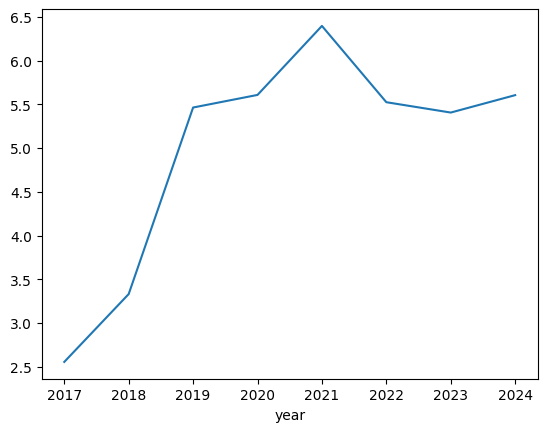

In [292]:
main_brands_mobile_long.groupby('year')['Average Age'].mean().plot()

<Axes: xlabel='year'>

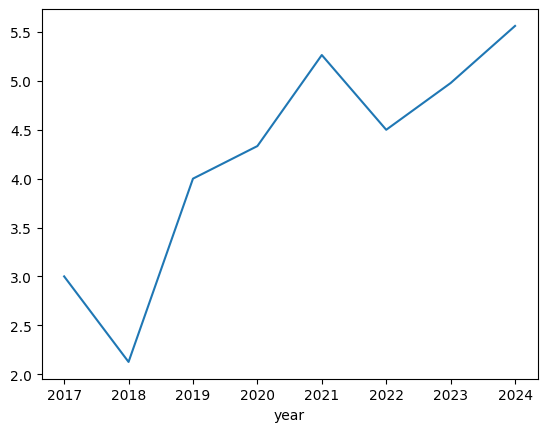

In [293]:
main_brands_mobile_long.groupby('year')['Average Age'].median().plot()

In [342]:
df[df['product_category'] == 'Mobile']['product_age'].median()

4.0

In [341]:
main_brands_mobile[main_brands_mobile['product_category'] == 'Mobile'].groupby('brand')['product_age'].median().sort_values()

brand
Alcatel        2.00
Xiaomi         2.00
Microsoft      2.25
Motorola       3.00
Apple          3.00
Unknown        3.00
Huawei         3.00
LG             3.00
Google         4.00
Fairphone      4.00
Samsung        4.00
Doro           5.00
Sony           5.00
HTC            5.00
BlackBerry     5.00
Gigaset        7.00
Nokia         10.00
Panasonic     10.00
Siemens       13.00
Name: product_age, dtype: float64

In general, mobile phones could be getting a bit longer-lasting over the years - or this data might be meaningless if it's also because more people have used mobile phones for longer in recent years.

In [327]:
main_brands_mobile.to_csv('main_brands_mobile.csv')

## Plotting the main brands for mobile devices versus age of the product in R for better EDA

In [153]:
%%R

library(dplyr)

In [156]:
%%R
library(ggplot2)

R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Removed 2949 rows containing non-finite outside the scale range
(`stat_boxplot()`). 

R[write to console]: 2: Removed 2949 rows containing missing values or values outside the scale range
(`geom_point()`). 



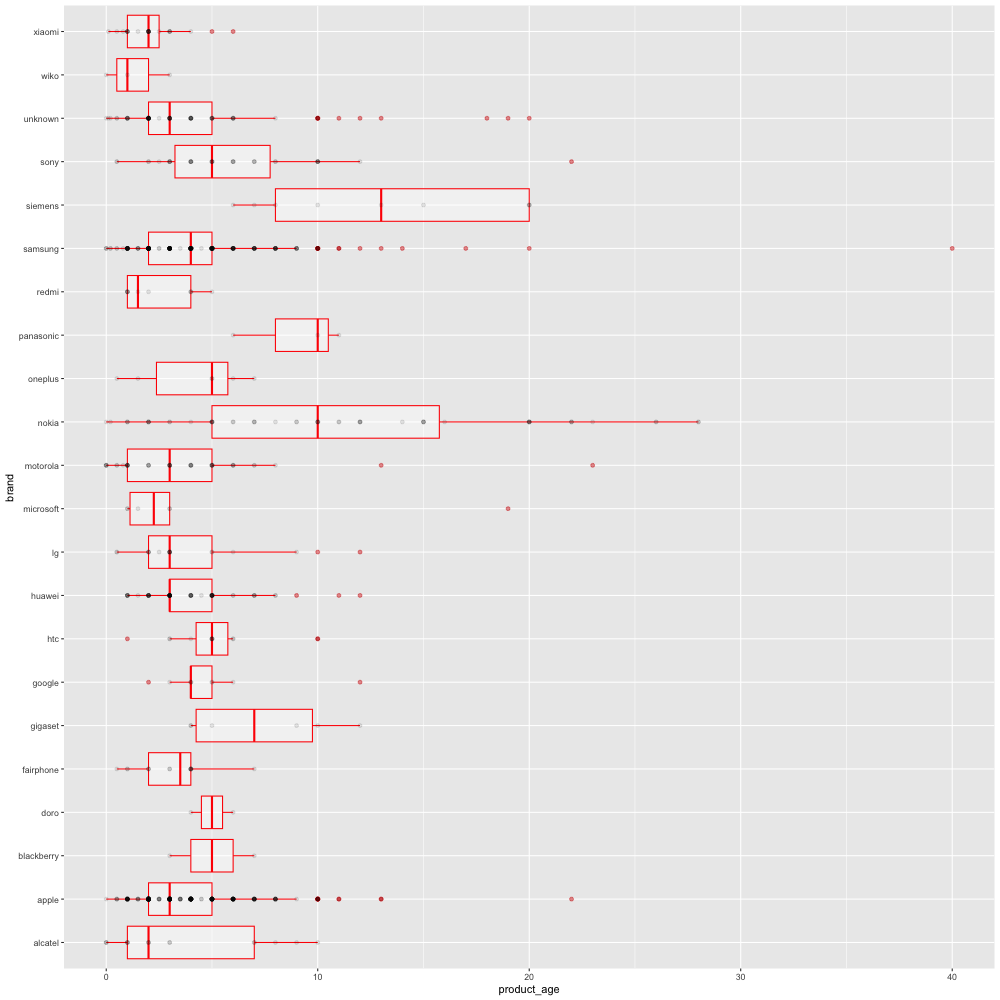

In [294]:
%%R -i main_brands_mobile -h 1000 -w 1000

ggplot(main_brands_mobile) +
    aes(x=product_age, y=brand) +
    geom_boxplot(alpha=.4, color='red') +
    geom_point(alpha=.1) 

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: Removed 2949 rows containing missing values or values outside the scale range
(`geom_point()`). 



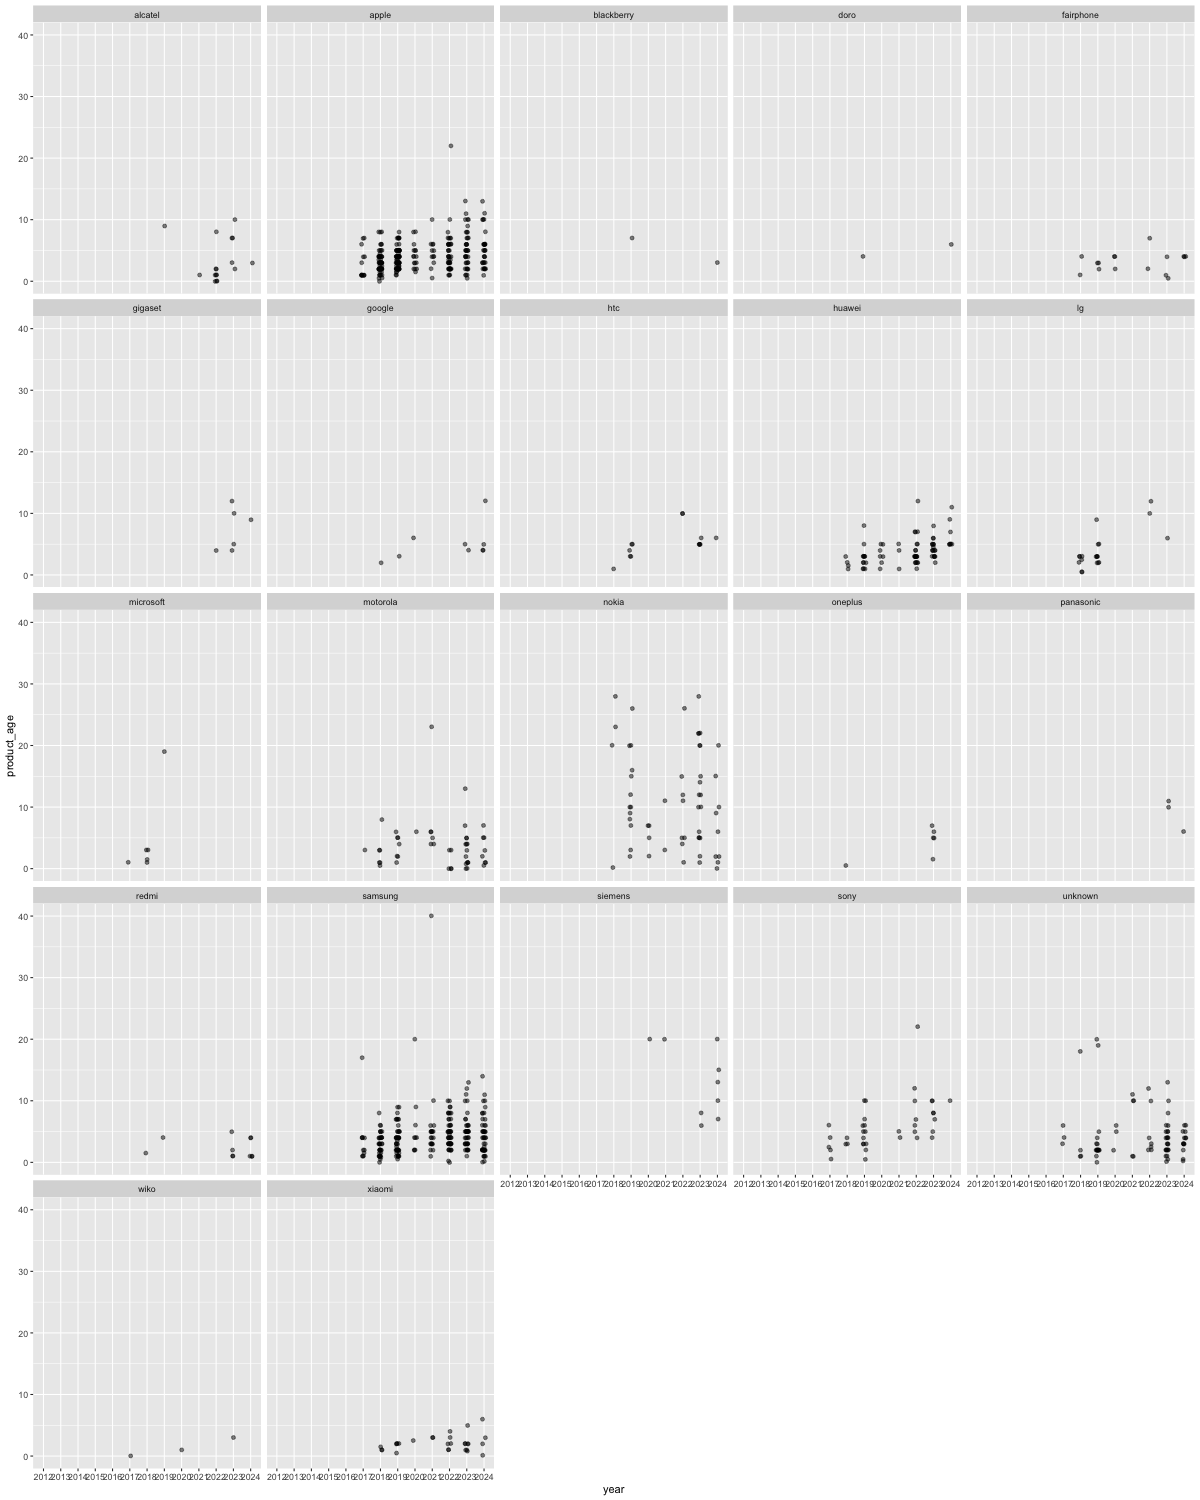

In [173]:
%%R -i main_brands_mobile -h 1500 -w 1200

ggplot(main_brands_mobile) +
    aes(x=year, y=product_age) +
    geom_jitter(width=.1, alpha=.5) +
    facet_wrap(~brand)

In [330]:
brand_corrections = {
    'iphone': 'Apple',
    'Iphone': 'Apple',
    'appel': 'Apple',
    'samsung': 'Samsung',
    'Redmi': 'Xiaomi',  # Merging Redmi into Xiaomi
}


main_brands_mobile['brand'] = main_brands_mobile['brand'].str.strip().replace(brand_corrections)


cleaned_unique_brands = main_brands_mobile['brand'].dropna().unique()
cleaned_unique_brands

array(['Samsung', 'Unknown', 'Gigaset', 'Motorola', 'Apple', 'Siemens',
       'Nokia', 'Xiaomi', 'Huawei', 'Sony', 'Doro', 'Panasonic',
       'Alcatel', 'HTC', 'Fairphone', 'Google', 'LG', 'Microsoft',
       'BlackBerry'], dtype=object)

## Giving each brand a different rank number based on their median product ages so it can be visualized in a dot plot (produced on scatter plot) in Datawrapper

In [333]:
brand_median_ages = main_brands_mobile.groupby('brand', dropna=True)['product_age'].median().sort_values()

brand_ranking = {brand: rank+1 for rank, brand in enumerate(brand_median_ages.index)}

main_brands_mobile['brand_number'] = main_brands_mobile['brand'].map(brand_ranking)

main_brands_mobile[['brand', 'product_age', 'brand_number']].head()

       brand  product_age  brand_number
41   Samsung          NaN            11
105  Unknown          NaN             6
111  Unknown          NaN             6
112  Unknown          NaN             6
113  Unknown          NaN             6


In [334]:
main_brands_mobile.head()

,id,data_provider,country,partner_product_category,product_category,product_category_id,brand,year_of_manufacture,product_age,repair_status,repair_barrier_if_end_of_life,group_identifier,event_date,problem,problem_eng,repair_status_number,brand_number
41,anstiftung_23630,anstiftung,DEU,Smartphone/Tablet ~ Handy,Mobile,19,Samsung,NaN,NaN,Fixed,NaN,52082,2024-07-26,Fhlermeldung: Speicher ist voll.,Error message: Memory is full.,3.0,11
105,anstiftung_23461,anstiftung,DEU,Smartphone/Tablet ~ Smartphone,Mobile,19,Unknown,NaN,NaN,Fixed,NaN,33589,2024-07-20,Hilfe bei Bedienung.,Help with operation.,3.0,6
111,anstiftung_23470,anstiftung,DEU,Smartphone/Tablet ~ Smartphone,Mobile,19,Unknown,NaN,NaN,Fixed,NaN,33589,2024-07-20,Beratungsbedarf.,need for advice.,3.0,6
112,anstiftung_23471,anstiftung,DEU,Smartphone/Tablet ~ Smartphone,Mobile,19,Unknown,NaN,NaN,Fixed,NaN,33589,2024-07-20,Beratungsbedarf.,need for advice.,3.0,6
113,anstiftung_23473,anstiftung,DEU,Smartphone/Tablet ~ Smartphone,Mobile,19,Unknown,NaN,NaN,Fixed,NaN,33589,2024-07-20,Beratungsbedarf.,need for advice.,3.0,6


In [335]:
main_brands_mobile.to_csv('main_brands_mobile.csv', index=False)

## Brand by product age for laptops

In [186]:
df['product_category'].value_counts()

product_category
Vacuum                               16056
Lamp                                 13782
Power tool                           12809
Hi-Fi separates                      12600
Coffee maker                         12426
Small home electrical                12009
Small kitchen item                   10289
Food processor                       10077
Laptop                                9732
Portable radio                        9625
Sewing machine                        7573
Watch/clock                           6874
Toaster                               5233
Large home electrical                 4931
TV and gaming-related accessories     4837
Iron                                  4539
Kettle                                4532
Decorative or safety lights           4507
Mobile                                4268
Printer/scanner                       4113
Toy                                   4054
Hair & beauty item                    3941
Battery/charger/adapter              

In [190]:
df['brand'] = df['brand'].str.replace(r'mac.*', 'apple', regex=True)

In [192]:
df['brand'] = df['brand'].str.replace(r'hp.*', 'hp', regex=True)

In [194]:
df['brand'] = df['brand'].str.replace(r'fujitsu.*', 'hp', regex=True)

In [196]:
df['brand'] = df['brand'].str.replace('h[', 'hp')

In [198]:
df['brand'] = df['brand'].str.replace('lenova', 'lenovo')

In [200]:
df['brand'] = df['brand'].str.replace(r'lenovo.*', 'lenovo', regex=True)

In [202]:
df['brand'] = df['brand'].str.replace('eapple', 'apple')

In [203]:
df['brand'] = df['brand'].str.replace('e-apple', 'apple')

In [205]:
df['brand'] = df['brand'].str.replace('asos', 'asus')

In [207]:
df['brand'] = df['brand'].str.replace('thinkpad', 'lenovo')

In [209]:
df['brand'] = df['brand'].str.replace(r'hewlett.*', 'hewlett packard', regex=True)

In [211]:
df['brand'] = df['brand'].str.replace(r'dell.*', 'dell', regex=True)

In [216]:
df['brand'] = df['brand'].str.replace(r'sony.*', 'sony', regex=True)

In [213]:
df['brand'] = df['brand'].str.replace('vaio', 'sony')

In [218]:
df['brand'] = df['brand'].str.replace('lanovo', 'lenovo')

In [220]:
df['brand'] = df['brand'].str.replace('aser', 'acer')

In [222]:
df['brand'] = df['brand'].str.replace(r'm.dion.*', 'medion', regex=True)

In [349]:
#df[df['product_category'] == 'Laptop']['brand'].value_counts().head(30)

In [258]:
laptops = df[df['product_category'] == 'Laptop']

In [259]:
avg_age_laptops = pd.pivot_table(laptops, values='product_age', index=['year'],
                       columns=['brand'], aggfunc="mean")

avg_age_laptops

brand,abus,ace,acer,acer asoirv3,acer chromebook,acer chromebook 14,acerspin 5,acess,acre,addison,...,touch mate,trekstor,unknown,utech,vtech,wocter,xiaomi,yepo,yestel,zoostorm
year,,,,,,,,,,,,,,,,,,,,,
2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017,NaN,NaN,7.153846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,6.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018,NaN,NaN,5.890625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,7.142857,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019,NaN,0.0,6.487179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.661290,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020,NaN,NaN,5.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.357143,NaN,NaN,NaN,NaN,NaN,NaN,2.0
2021,NaN,NaN,7.954545,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,3.0,NaN,6.285714,NaN,11.0,NaN,NaN,NaN,NaN,NaN
2022,8.0,NaN,6.848101,NaN,NaN,NaN,NaN,NaN,NaN,7.0,...,NaN,4.0,5.926471,10.0,NaN,NaN,NaN,NaN,NaN,NaN
2023,NaN,NaN,6.841463,NaN,NaN,NaN,NaN,5.0,10.0,NaN,...,NaN,8.0,6.000000,NaN,NaN,NaN,7.0,3.0,NaN,NaN


In [265]:
avg_age_laptops.dtypes

brand
year                      object
abus                     float64
ace                      float64
acer                     float64
acer asoirv3             float64
acer chromebook          float64
acer chromebook 14       float64
acerspin 5               float64
acess                    float64
acre                     float64
addison                  float64
advent                   float64
aesus                    float64
akoya                    float64
alienware                float64
alpha                    float64
aoc                      float64
apple                    float64
aspire                   float64
aspires                  float64
assus                    float64
asus                     float64
asusvivobook14           float64
azus                     float64
ced                      float64
china                    float64
chrome book              float64
chromebook               float64
chuwi                    float64
clementoni               float64
clev

## Creating a sub-df with only the main brands for the laptops

In [253]:
brand_counts = df[df['product_category'] == 'Laptop']['brand'].value_counts()

In [254]:
brands_to_keep = brand_counts[brand_counts >= 10].index 

In [67]:
main_brands_laptops = df[(df['product_category'] == 'Laptop') & (df['brand'].isin(brands_to_keep))]

main_brands_laptops.head()

,id,data_provider,country,partner_product_category,product_category,product_category_id,brand,year_of_manufacture,product_age,repair_status,repair_barrier_if_end_of_life,group_identifier,event_date,problem,problem_eng,repair_status_number
88,anstiftung_23449,anstiftung,DEU,Computer ~ Laptop,Laptop,16,Unknown,NaN,NaN,End of life,Item too worn out,33589,2024-07-20,Software Fehler.,software error.,1.0
91,anstiftung_23506,anstiftung,DEU,Computer ~ Laptop,Laptop,16,Unknown,NaN,NaN,End of life,NaN,42327,2024-07-20,Einstellungen.,Settings.,1.0
96,anstiftung_23481,anstiftung,DEU,Computer ~ Laptop,Laptop,16,Unknown,NaN,NaN,Repairable,NaN,33589,2024-07-20,Tastatur klemmt.,Keyboard is stuck.,2.0
157,anstiftung_23347,anstiftung,DEU,Computer ~ Laptop,Laptop,16,Unknown,NaN,NaN,End of life,NaN,13818,2024-07-15,"1,5 Kg, es kommt kein Bild.","1.5 kg, no picture.",1.0
274,anstiftung_23266,anstiftung,DEU,Computer ~ Laptop,Laptop,16,Unknown,2023.0,1.0,End of life,Repair information not available,28604,2024-07-07,Bluetooth-Verbindung zum Drucker geht nicht mehr.,Bluetooth connection to the printer no longer works.,1.0


In [301]:
main_brands_laptops['product_age'].median()

6.0

In [302]:
main_brands_laptops['product_age'].mean()

7.1988013698630136

## EDA in R to visualize the main laptop brands by the average product age

R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Removed 6515 rows containing non-finite outside the scale range
(`stat_boxplot()`). 

R[write to console]: 2: Removed 6515 rows containing missing values or values outside the scale range
(`geom_point()`). 



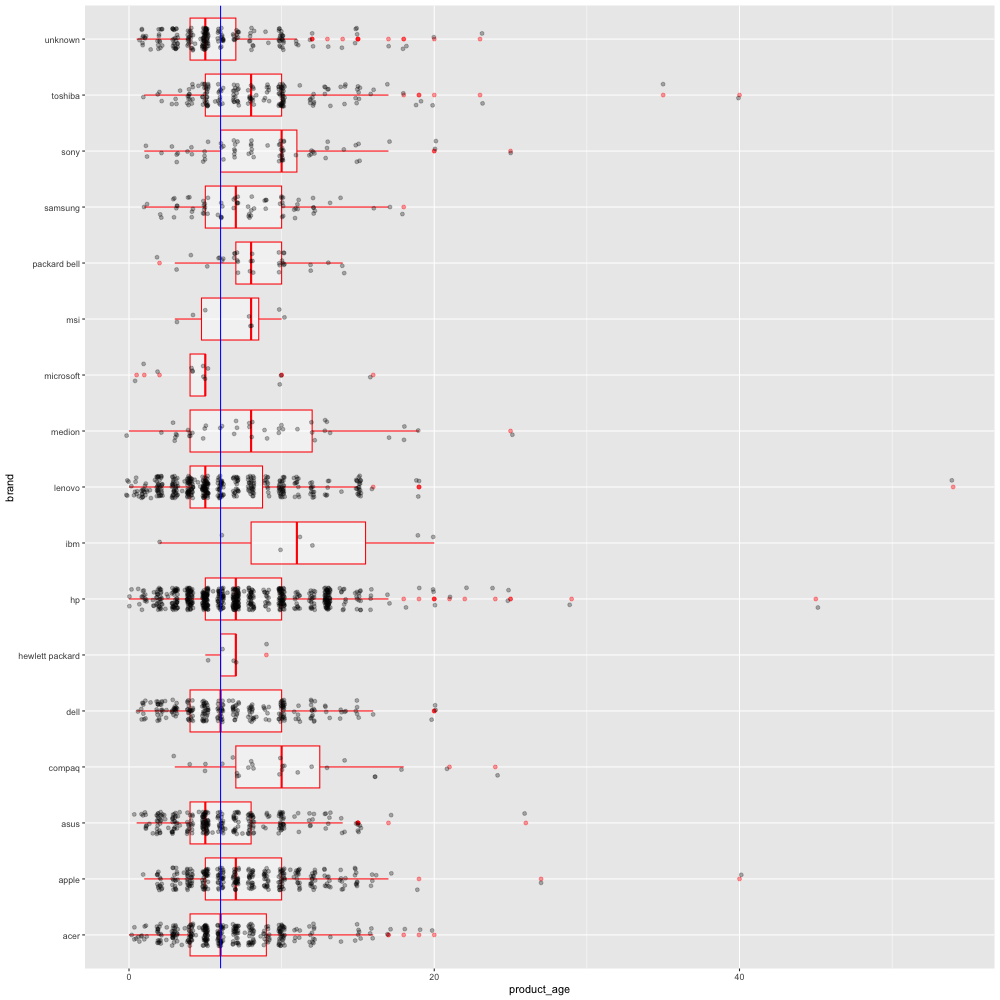

In [310]:
%%R -i main_brands_laptops -h 1000 -w 1000

ggplot(main_brands_laptops) +
    aes(x=product_age, y=brand) +
    geom_boxplot(alpha=.4, color='red') +
    geom_jitter(alpha=.3, height=.2) +
    geom_vline(aes(xintercept=6), color='blue')

Of the laptop brands with 400 or more repairs (HP, Lenovo, Apple, Acer, Dell, Asus, and Toshiba) - the median Lenovo and Asus laptops were brought in sooner than the overall laptop median, and HP and Apple slightly above the median. Acer and Dell right on the median (6 years). There are some people who keep them really long - or it's errors in the data.

In [270]:
avg_age_laptops = pd.pivot_table(main_brands_laptops, values='product_age', index=['year'],
                       columns=['brand'], aggfunc="mean")

avg_age_laptops

brand,acer,apple,asus,compaq,dell,hewlett packard,hp,ibm,lenovo,medion,microsoft,msi,packard bell,samsung,sony,toshiba,unknown
year,,,,,,,,,,,,,,,,,
2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017,7.153846,6.142857,4.900000,10.333333,6.250000,NaN,5.714286,6.0,8.500000,NaN,NaN,NaN,7.250000,5.000000,7.250000,4.200000,6.666667
2018,5.890625,5.761905,4.673913,8.000000,5.785714,NaN,6.338710,NaN,4.970588,13.400000,4.000000,NaN,7.250000,5.571429,6.333333,6.545455,7.142857
2019,6.487179,5.471014,5.485294,8.000000,8.217391,7.0,5.645570,15.0,4.820755,8.000000,2.166667,3.500000,6.571429,6.812500,7.357143,7.441860,4.661290
2020,5.500000,7.300000,6.300000,NaN,8.071429,6.0,6.529412,NaN,6.125000,8.000000,6.000000,NaN,9.250000,7.250000,8.333333,7.437500,5.357143
2021,7.954545,8.904762,4.225000,NaN,6.800000,9.0,6.720000,10.0,5.000000,NaN,5.000000,NaN,8.600000,NaN,10.000000,10.583333,6.285714
2022,6.848101,10.144928,7.307018,14.600000,6.695312,7.0,8.955645,7.0,7.738318,6.375000,10.500000,7.666667,6.000000,8.684211,11.272727,9.255814,5.926471
2023,6.841463,8.750000,6.686567,11.750000,5.818182,5.0,7.116667,20.0,6.726950,7.714286,10.000000,8.000000,10.285714,8.750000,10.470588,9.661290,6.000000
2024,6.304688,8.033898,7.176471,11.500000,8.255814,NaN,7.918750,NaN,5.440299,10.125000,4.333333,10.000000,12.000000,6.500000,9.285714,13.000000,6.435897


In [272]:
avg_age_laptops = avg_age_laptops.reset_index()

In [283]:
main_brands_laptops_long = avg_age_laptops.melt(id_vars=['year'], 
                      value_vars=[col for col in avg_age_laptops.columns if col != 'year'],
                      var_name='Brand', 
                      value_name='Average Age')

main_brands_laptops_long.head()

,year,Brand,Average Age
0,2015,acer,NaN
1,2017,acer,7.153846
2,2018,acer,5.890625
3,2019,acer,6.487179
4,2020,acer,5.500000


<Axes: xlabel='year'>

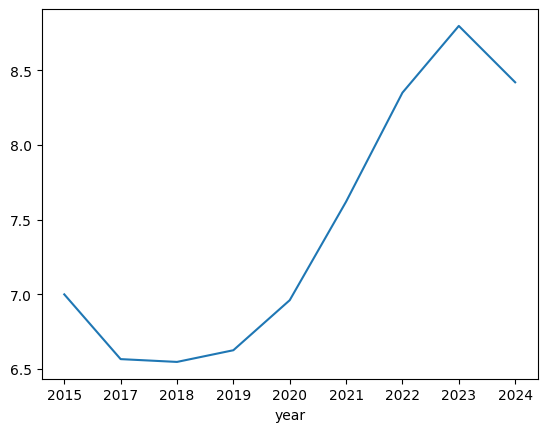

In [281]:
main_brands_laptops_long.groupby('year')['Average Age'].mean().plot()

<Axes: xlabel='year'>

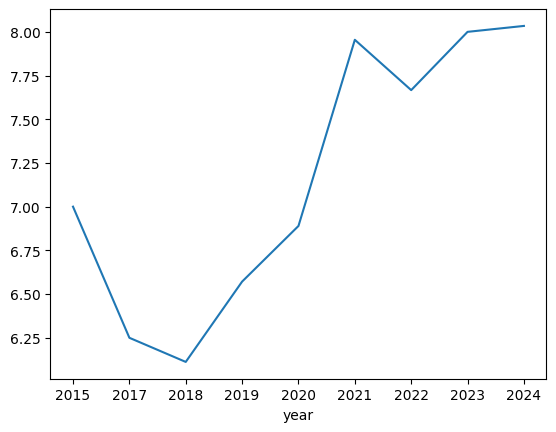

In [282]:
main_brands_laptops_long.groupby('year')['Average Age'].median().plot()

Both the mean and median show an increase in the average age of laptops being taken in. However, this could coincide with more people owning laptops longer in general. Also, 'year' of the repair event does not necessarily coincide with year of product manufacture.

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: Removed 32 rows containing missing values or values outside the scale range
(`geom_point()`). 



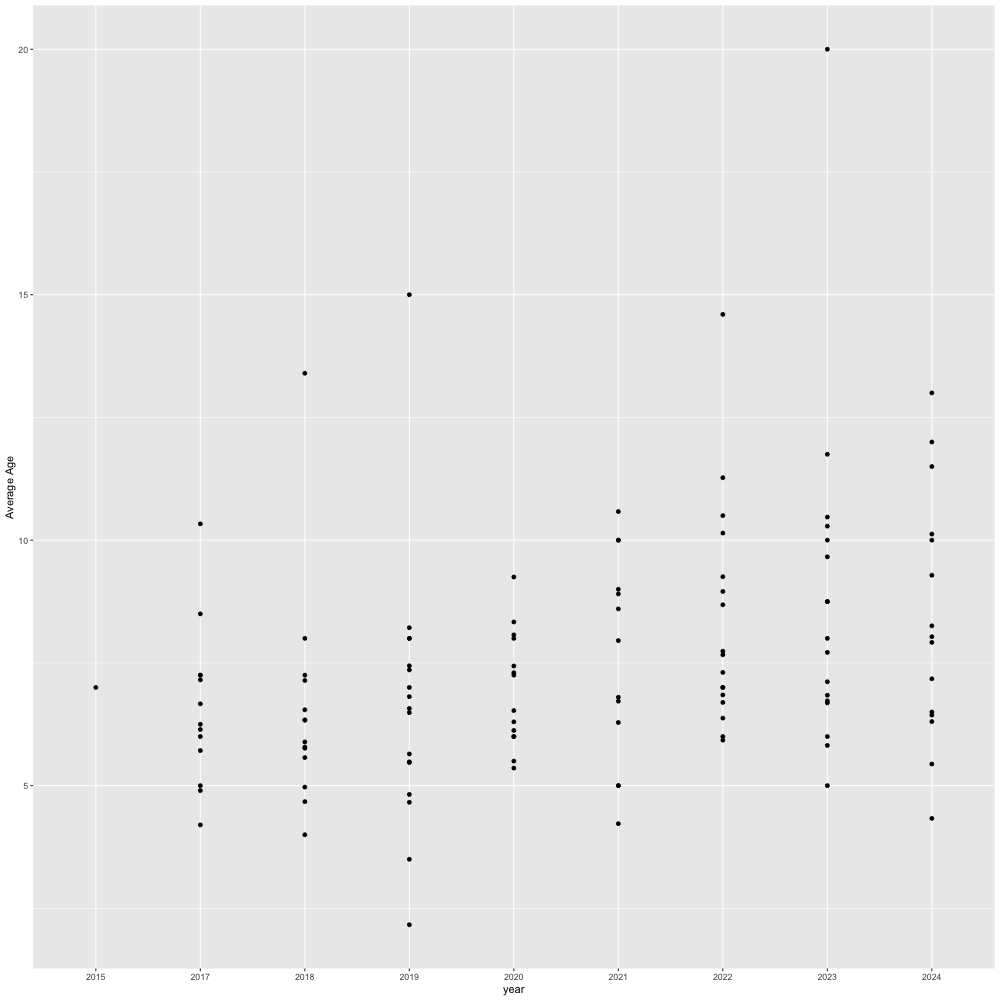

In [278]:
%%R -i main_brands_laptops_long -h 1000 -w 1000

ggplot(main_brands_laptops_long) +
    aes(x=year, y=`Average Age`) +
    geom_point() 

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: Removed 32 rows containing missing values or values outside the scale range
(`geom_point()`). 



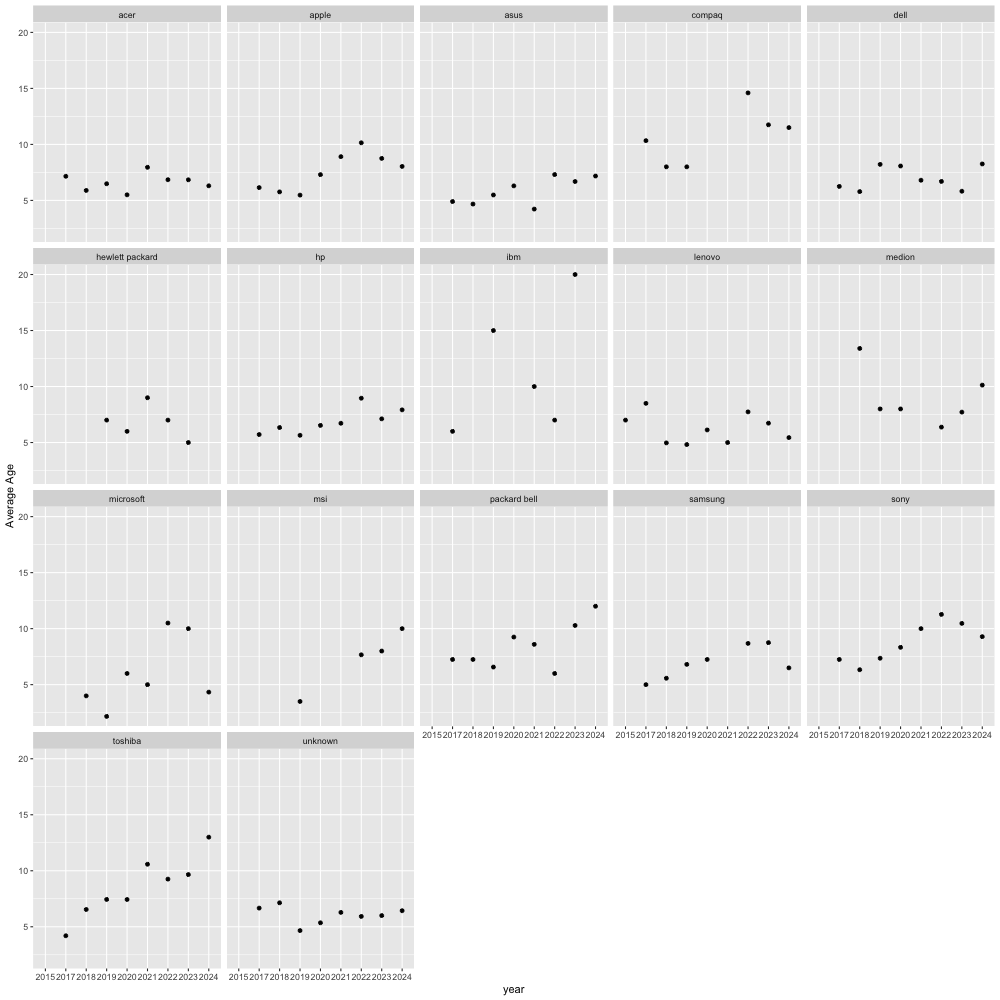

In [277]:
%%R -i main_brands_laptops_long -h 1000 -w 1000

ggplot(main_brands_laptops_long) +
    aes(x=year, y=`Average Age`) +
    geom_point() +
    facet_wrap(~Brand)

Of the laptop brands that have >400 entries in the dataset (HP, Lenovo, Apple, Acer, Dell, Asus, and Toshiba), the average age of laptops being taken in for repair has decreased for Apple and Lenovo since 2022. For Toshiba it has increased. 

## Are phones getting more or less repairable over time?

In [32]:
df.dtypes

id                                object
data_provider                     object
country                           object
partner_product_category          object
product_category                  object
product_category_id                int64
brand                             object
year_of_manufacture              float64
product_age                      float64
repair_status                     object
repair_barrier_if_end_of_life     object
group_identifier                  object
event_date                        object
problem                           object
problem_eng                       object
dtype: object

In [34]:
df['repair_status_number'] = df['repair_status'] \
    .str.replace('Fixed', '3', regex=False) \
    .str.replace('Repairable', '2', regex=False) \
    .str.replace('End of life', '1', regex=False) \
    .str.replace('Unknown', '', regex=False)

In [35]:
df['repair_status_number'] = pd.to_numeric(df['repair_status_number'], errors='coerce')

In [45]:
df.groupby('year_of_manufacture')['repair_status_number'].mean()

year_of_manufacture
1884.0    2.000000
1890.0    3.000000
1901.0    2.083333
1902.0    1.000000
1903.0    2.200000
1904.0    3.000000
1905.0    3.000000
1909.0    3.000000
1910.0    2.692308
1912.0    3.000000
1915.0    2.000000
1918.0    1.600000
1919.0    2.000000
1920.0    2.409091
1921.0    2.571429
1922.0    2.545455
1923.0    2.571429
1924.0    2.500000
1925.0    2.400000
1927.0    3.000000
1928.0    3.000000
1929.0    3.000000
1930.0    2.363636
1931.0    3.000000
1932.0    2.800000
1933.0    2.500000
1934.0    2.500000
1935.0    2.500000
1936.0    1.333333
1937.0    2.750000
1938.0    2.500000
1939.0    2.200000
1940.0    2.537037
1941.0    3.000000
1942.0    2.400000
1943.0    2.666667
1944.0    2.444444
1945.0    2.285714
1946.0    3.000000
1947.0    3.000000
1948.0    2.777778
1949.0    2.250000
1950.0    2.353933
1951.0    2.400000
1952.0    2.352941
1953.0    2.315789
1954.0    2.607143
1955.0    2.406250
1956.0    2.166667
1957.0    2.347826
1958.0    2.714286
1959.0    2

Repairability has declined over the years based on the year of product manufacture. But it's important to consider the size of the sample in each year to make accurate comparisons (some years have few products and others have many).

In [46]:
df.groupby('year_of_manufacture').size()

year_of_manufacture
1884.0       1
1890.0       1
1901.0      12
1902.0       1
1903.0       5
1904.0       1
1905.0       1
1909.0       1
1910.0      13
1912.0       1
1915.0       2
1918.0       5
1919.0       6
1920.0      45
1921.0       7
1922.0      11
1923.0      14
1924.0      14
1925.0       5
1927.0       1
1928.0       1
1929.0       1
1930.0      66
1931.0       1
1932.0       5
1933.0       6
1934.0       6
1935.0       8
1936.0       3
1937.0       4
1938.0       4
1939.0       5
1940.0      54
1941.0       1
1942.0       5
1943.0       9
1944.0       9
1945.0      14
1946.0       6
1947.0       1
1948.0       9
1949.0      20
1950.0     178
1951.0      10
1952.0      17
1953.0      38
1954.0      30
1955.0      32
1956.0      12
1957.0      23
1958.0      28
1959.0      27
1960.0     252
1961.0      22
1962.0      68
1963.0     112
1964.0      76
1965.0      82
1966.0      10
1967.0      28
1968.0      46
1969.0      83
1970.0     446
1971.0      44
1972.0     133
1973.

In [42]:
df[df['product_category'] == 'Mobile'].groupby('year_of_manufacture')['repair_status_number'].mean()

year_of_manufacture
1972.0    2.000000
1981.0    3.000000
1988.0    1.000000
1990.0    3.000000
1991.0    2.000000
1993.0    3.000000
1994.0    1.000000
1995.0    2.333333
1996.0    3.000000
1998.0    3.000000
1999.0    2.333333
2000.0    1.800000
2001.0    3.000000
2003.0    2.250000
2004.0    2.000000
2006.0    3.000000
2007.0    3.000000
2008.0    1.000000
2009.0    2.125000
2010.0    2.400000
2011.0    2.050000
2012.0    2.257143
2013.0    2.326087
2014.0    2.354430
2015.0    2.269231
2016.0    2.238411
2017.0    2.263804
2018.0    2.456522
2019.0    2.302083
2020.0    2.477273
2021.0    2.525424
2022.0    2.516667
2023.0    2.277778
2024.0    2.375000
Name: repair_status_number, dtype: float64

In [47]:
df[df['product_category'] == 'Laptop'].groupby('year_of_manufacture')['repair_status_number'].mean()

year_of_manufacture
1969.0    1.000000
1979.0    3.000000
1982.0    3.000000
1984.0    3.000000
1986.0    3.000000
1990.0    2.000000
1994.0    3.000000
1996.0    3.000000
1998.0    2.000000
1999.0    2.000000
2000.0    2.142857
2001.0    2.000000
2002.0    1.750000
2003.0    2.100000
2004.0    2.318182
2005.0    2.125000
2006.0    2.173913
2007.0    2.263158
2008.0    2.258065
2009.0    2.642336
2010.0    2.236686
2011.0    2.363636
2012.0    2.335968
2013.0    2.304348
2014.0    2.355469
2015.0    2.490566
2016.0    2.395257
2017.0    2.372470
2018.0    2.394834
2019.0    2.435000
2020.0    2.348101
2021.0    2.418367
2022.0    2.425926
2023.0    2.500000
2024.0    2.500000
Name: repair_status_number, dtype: float64

In [250]:
df_numbers = pd.pivot_table(df, index=['year_of_manufacture'], columns=['broad_category'], aggfunc="size")

df_numbers = df_numbers.where(df_numbers >= 10)

In [251]:
df_numbers = df_numbers.reset_index()

In [252]:
df_numbers['year_of_manufacture'] = df_numbers['year_of_manufacture'].astype('str')

In [275]:
df_numbers['year_of_manufacture'] = df_numbers['year_of_manufacture'].str.replace('.0', '')

In [256]:
df_repairability = pd.pivot_table(df, index=['year_of_manufacture'], columns=['broad_category'], values='repair_status_number', aggfunc="mean")

In [258]:
df_repairability = df_repairability.reset_index()

In [276]:
df_repairability = df_repairability.where(df_numbers.notna())

In [260]:
df_repairability['year_of_manufacture'] = df_repairability['year_of_manufacture'].astype('str')

In [351]:
df_repairability['year_of_manufacture'] = df_repairability['year_of_manufacture'].str.replace('.0', '')

In [262]:
df_repairability.to_csv('repairability_10_values_plus.csv', index=False)

In [50]:
phones = df[df['product_category'] == 'Mobile']

In [51]:
laptops = df[df['product_category'] == 'Laptop']

In [274]:
phone_repairability = pd.pivot_table(main_brands_mobile, index=['year_of_manufacture'], columns=['brand'], values='repair_status_number', aggfunc="mean")

## Repairability of laptops over time

In [68]:
laptop_repairability = pd.pivot_table(main_brands_laptops, index=['year_of_manufacture'], columns=['brand'], values='repair_status_number', aggfunc="mean")
laptop_repairability

brand,Apple,Google,Huawei,LG,Microsoft,Samsung,Siemens,Sony,Unknown,Xiaomi,appel,samsung
year_of_manufacture,,,,,,,,,,,,
1982.0,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994.0,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN
2000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.666667,NaN,NaN,NaN
2002.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.500000,NaN,NaN,NaN,NaN
2003.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,1.000000,NaN,NaN,NaN
2004.0,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,1.000000,NaN,NaN,NaN
2005.0,1.000000,NaN,NaN,NaN,NaN,2.000000,NaN,2.000000,2.000000,NaN,NaN,NaN
2006.0,1.666667,NaN,NaN,NaN,1.0,3.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
phone_repairability.to_csv('phone_repairability.csv')

In [69]:
laptop_repairability.to_csv('laptop_repairability.csv')

## Repairability divided by category

In [74]:
categories_repairability = pd.pivot_table(df, index=['year_of_manufacture'], columns=['broad_category'], values='repair_status_number', aggfunc="mean")
categories_repairability

broad_category,Accessories,Audio,Climate Control,Computers,Entertainment,Home & DIY,Home Appliances,Kitchen Appliances,Lighting,Music,Office Equipment,Other,Personal Care,Phones & Tablets,Photography,Toys & Games,Wearables
year_of_manufacture,,,,,,,,,,,,,,,,,
1884.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
1890.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000
1901.0,NaN,1.000000,2.000000,2.000000,NaN,2.000000,1.750000,3.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1902.0,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1903.0,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
1904.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000
1905.0,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1909.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000
1910.0,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,2.777778


In [75]:
categories_repairability.to_csv('categories_repairability.csv')

<Axes: xlabel='year'>

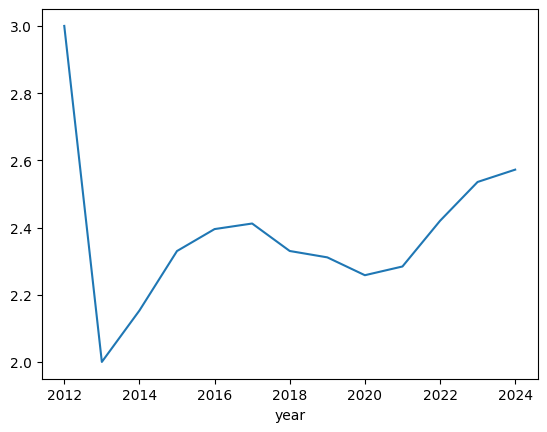

In [354]:
df[df['product_category'] == 'Mobile'].groupby('year')['repair_status_number'].mean().plot()

Generally, more repairable (I don't count 2012-2013 because of the small number of data)

In [358]:
df[df['product_category'] == 'Mobile'].groupby('year')['repair_status_number'].size()

year
2012      1
2013     29
2014     85
2015    100
2016    222
2017    376
2018    549
2019    659
2020    192
2021    174
2022    470
2023    879
2024    532
Name: repair_status_number, dtype: int64

<Axes: xlabel='year'>

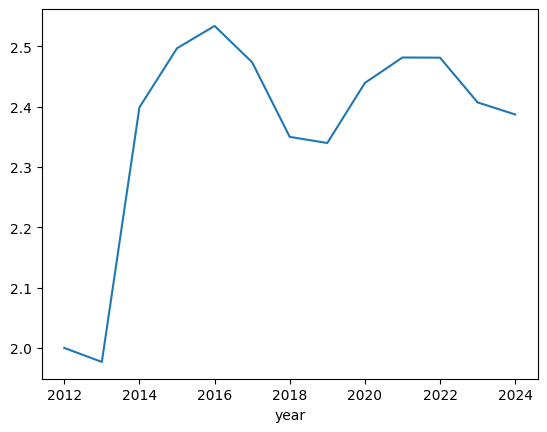

In [359]:
df[df['product_category'] == 'Laptop'].groupby('year')['repair_status_number'].mean().plot()

Laptops have been a little more reparable than phones, but haven't changed much in their repairability since 2014 (even declined a little). Now, phones and laptops repairability are almost the same.

In [360]:
df[df['product_category'] == 'Laptop'].groupby('year')['repair_status_number'].size()

year
2012       1
2013      86
2014     178
2015     165
2016     424
2017     784
2018     803
2019    1277
2020     398
2021     417
2022    1890
2023    1984
2024    1325
Name: repair_status_number, dtype: int64

In [266]:
df.shape

(208491, 18)

In [270]:
df[df['repair_status_number'] == 3].shape[0]

110731

In [271]:
df[df['repair_status_number'] == 2].shape[0]

38226

In [272]:
df[df['repair_status_number'] == 1].shape[0]

52266

In [273]:
df[df['repair_status_number'] == 0].shape[0]

0

In [345]:
df.groupby('year_of_manufacture')['repair_status_number'].mean()

year_of_manufacture
1884.0    2.000000
1890.0    3.000000
1901.0    2.083333
1902.0    1.000000
1903.0    2.200000
1904.0    3.000000
1905.0    3.000000
1909.0    3.000000
1910.0    2.692308
1912.0    3.000000
1915.0    2.000000
1918.0    1.600000
1919.0    2.000000
1920.0    2.409091
1921.0    2.571429
1922.0    2.545455
1923.0    2.571429
1924.0    2.500000
1925.0    2.400000
1927.0    3.000000
1928.0    3.000000
1929.0    3.000000
1930.0    2.363636
1931.0    3.000000
1932.0    2.800000
1933.0    2.500000
1934.0    2.500000
1935.0    2.500000
1936.0    1.333333
1937.0    2.750000
1938.0    2.500000
1939.0    2.200000
1940.0    2.537037
1941.0    3.000000
1942.0    2.400000
1943.0    2.666667
1944.0    2.444444
1945.0    2.285714
1946.0    3.000000
1947.0    3.000000
1948.0    2.777778
1949.0    2.250000
1950.0    2.353933
1951.0    2.400000
1952.0    2.352941
1953.0    2.315789
1954.0    2.607143
1955.0    2.406250
1956.0    2.166667
1957.0    2.347826
1958.0    2.714286
1959.0    2

## Most repairable brands over time

In [369]:
df['brand'] = df['brand'].str.replace('phillips', 'philips')

In [370]:
df['brand'] = df['brand'].str.replace('black+decker', 'black & decker')

In [371]:
df['brand'] = df['brand'].str.replace('krups nespresso', 'nespresso')

In [372]:
df['brand'] = df['brand'].str.replace('kärcher', 'karcher')

In [373]:
df['brand'] = df['brand'].str.replace('ukendt', 'unknown')

In [374]:
df['brand'] = df['brand'].str.replace('b&o', 'bang & olufsen')

In [378]:
df['brand'] = df['brand'].str.replace('senseo', 'philips')

In [353]:
top_100_brands = df['brand'].value_counts().head(101).reset_index()
top_100_brands

,brand,count
0,Unknown,80317
1,Philips,9763
2,Bosch,3894
3,Sony,3540
4,HP,2712
5,Samsung,2617
6,Apple,2487
7,Dyson,2014
8,Miele,1865
9,Kenwood,1547


In [354]:
top_100_brands = top_100_brands[top_100_brands['brand'] != 'unknown']

In [357]:
# df_top_100_brands = df[df['brand'].isin(top_100_brands['brand'])]
#df_top_100_brands.shape

In [398]:
df_top_100_brands.groupby('brand')['repair_status_number'].mean().sort_values(ascending=False)

brand
janome             2.691429
bernina            2.634361
toyota             2.613003
elna               2.585799
pfaff              2.556777
ikea               2.544592
singer             2.540779
husqvarna          2.509434
brother            2.476744
flymo              2.465753
lenovo             2.443074
sennheiser         2.442211
dual               2.426471
henry              2.423810
hoover             2.411330
apple              2.405631
miele              2.397970
vax                2.384335
nilfisk            2.378082
asus               2.375000
babyliss           2.373887
john lewis         2.370690
rowenta            2.370206
gardena            2.362162
logitech           2.355450
dell               2.344241
remington          2.343590
aeg                2.339982
roberts            2.338440
technics           2.336806
hp                 2.335831
acer               2.335189
shark              2.330330
yamaha             2.328859
seb                2.325893
saeco         

In [400]:
df_top_100_brands[df_top_100_brands['product_category'] == 'Mobile'].groupby('brand')['repair_status_number'].mean().sort_values(ascending=False)

brand
hp                3.000000
lenovo            2.750000
panasonic         2.545455
apple             2.524030
acer              2.500000
philips           2.500000
sony              2.258427
samsung           2.249612
asus              2.000000
bang & olufsen    2.000000
bosch             2.000000
grundig           2.000000
siemens           2.000000
lg                1.942857
Name: repair_status_number, dtype: float64

In [401]:
df_top_100_brands[df_top_100_brands['product_category'] == 'Mobile'].groupby('brand').size()

brand
acer                 2
apple             1093
asus                 7
bang & olufsen       2
bosch                1
grundig              1
hp                   1
lenovo               4
lg                  36
panasonic           11
philips              8
samsung            655
siemens             21
sony                89
dtype: int64

In [358]:
# (
#     df_top_100_brands[(df_top_100_brands['product_category'] == 'Mobile') & (df_top_100_brands['brand'] == 'apple')]
#     .groupby('year_of_manufacture')
#     ['repair_status_number']
#     .mean()
#     .plot()
# )

In [405]:
(
    df_top_100_brands[(df_top_100_brands['product_category'] == 'Mobile') & (df_top_100_brands['brand'] == 'apple')]
    .groupby('year')
    .size()
)

year
2013      8
2014     14
2015     35
2016     92
2017    160
2018    195
2019    173
2020     41
2021     31
2022     90
2023    119
2024    135
dtype: int64

Apple phones have declined slightly in repairability since 2014, but in 2024, repairability increased - when we are looking at the year of the repair event (not year of manufacture).

<Axes: xlabel='year'>

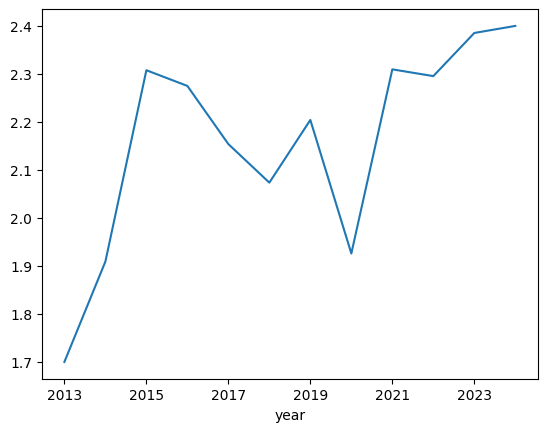

In [406]:
(
    df_top_100_brands[(df_top_100_brands['product_category'] == 'Mobile') & (df_top_100_brands['brand'] == 'samsung')]
    .groupby('year')
    ['repair_status_number']
    .mean()
    .plot()
)

In [407]:
(
    df_top_100_brands[(df_top_100_brands['product_category'] == 'Mobile') & (df_top_100_brands['brand'] == 'samsung')]
    .groupby('year')
    .size()
)

year
2013     10
2014     11
2015     13
2016     40
2017     39
2018     68
2019    100
2020     27
2021     44
2022     90
2023    113
2024    100
dtype: int64

Samsung phones have generally been a little less repairable than Apple phones but increased in repairability in recent years after a drop between 2015-2020

## Most repairable items

In [313]:
df.groupby('product_category')['repair_status_number'].mean().sort_values(ascending=False)

product_category
Lamp                                 2.588741
Sewing machine                       2.575696
Musical instrument                   2.480996
Misc                                 2.455399
Decorative or safety lights          2.418493
Laptop                               2.418419
Mobile                               2.410381
Watch/clock                          2.398169
Hair dryer                           2.393154
Desktop computer                     2.392634
Toy                                  2.384149
Vacuum                               2.357394
Paper shredder                       2.324464
Headphones                           2.314688
Battery/charger/adapter              2.301636
Projector                            2.300371
Small home electrical                2.291110
Power tool                           2.283796
Portable radio                       2.276346
Large home electrical                2.259583
PC accessory                         2.249073
Fan              

In [277]:
repair_status_categories = pd.pivot_table(df, index=['broad_category'], columns=['repair_status'], values='problem', aggfunc="size")

repair_status_categories

repair_status,End of life,Fixed,Repairable,Unknown
broad_category,,,,
Accessories,904,1881,454,162
Audio,7480,13664,5543,1125
Climate Control,830,1400,428,158
Computers,3553,8517,4120,744
Entertainment,3025,3952,2176,399
Home & DIY,4385,12156,3300,541
Home Appliances,16823,30627,10331,1945
Kitchen Appliances,6044,10232,3324,766
Lighting,2613,12394,2873,409


In [278]:
repair_status_categories['total'] = repair_status_categories['End of life'] + repair_status_categories['Fixed'] + repair_status_categories['Repairable'] + repair_status_categories['Unknown']
repair_status_categories.head()

repair_status,End of life,Fixed,Repairable,Unknown,total
broad_category,,,,,
Accessories,904,1881,454,162,3401
Audio,7480,13664,5543,1125,27812
Climate Control,830,1400,428,158,2816
Computers,3553,8517,4120,744,16934
Entertainment,3025,3952,2176,399,9552


In [279]:
repair_status_categories['end_of_life_pct'] = repair_status_categories['End of life'] / repair_status_categories['total']

In [280]:
repair_status_categories['fixed_pct'] = repair_status_categories['Fixed'] / repair_status_categories['total']

In [281]:
repair_status_categories['repairable_pct'] = repair_status_categories['Repairable'] / repair_status_categories['total']

In [282]:
repair_status_categories['unknown_pct'] = repair_status_categories['Unknown'] / repair_status_categories['total']

In [283]:
repair_status_categories['repaired_or_repairable'] = (repair_status_categories['Fixed'] + repair_status_categories['Repairable'])/repair_status_categories['total']

In [284]:
repair_status_categories.head()

repair_status,End of life,Fixed,Repairable,Unknown,total,end_of_life_pct,fixed_pct,repairable_pct,unknown_pct,repaired_or_repairable
broad_category,,,,,,,,,,
Accessories,904,1881,454,162,3401,0.265804,0.553073,0.133490,0.047633,0.686563
Audio,7480,13664,5543,1125,27812,0.268949,0.491299,0.199302,0.040450,0.690601
Climate Control,830,1400,428,158,2816,0.294744,0.497159,0.151989,0.056108,0.649148
Computers,3553,8517,4120,744,16934,0.209815,0.502953,0.243298,0.043935,0.746250
Entertainment,3025,3952,2176,399,9552,0.316688,0.413735,0.227806,0.041771,0.641541


In [285]:
repair_status_categories.to_csv('repair_status_categories.csv')

In [331]:
repair_status_items = pd.pivot_table(df, index=['product_category'], columns=['repair_status'], values='problem', aggfunc="size")

repair_status_items

repair_status,End of life,Fixed,Repairable,Unknown
product_category,,,,
Aircon/dehumidifier,253,380,197,67
Battery/charger/adapter,904,1881,454,162
Coffee maker,3680,6053,2433,260
DSLR/video camera,209,185,173,28
Decorative or safety lights,948,2781,651,127
Desktop computer,305,934,363,53
Digital compact camera,336,351,254,58
Fan,577,1020,231,91
Flat screen,628,587,558,93


In [332]:
repair_status_items['total'] = repair_status_items['End of life'] + repair_status_items['Fixed'] + repair_status_items['Repairable'] + repair_status_items['Unknown']
repair_status_items.head()

repair_status,End of life,Fixed,Repairable,Unknown,total
product_category,,,,,
Aircon/dehumidifier,253,380,197,67,897
Battery/charger/adapter,904,1881,454,162,3401
Coffee maker,3680,6053,2433,260,12426
DSLR/video camera,209,185,173,28,595
Decorative or safety lights,948,2781,651,127,4507


In [333]:
repair_status_items['end_of_life_pct'] = repair_status_items['End of life'] / repair_status_items['total']

In [334]:
repair_status_items['fixed_pct'] = repair_status_items['Fixed'] / repair_status_items['total']

In [335]:
repair_status_items['repairable_pct'] = repair_status_items['Repairable'] / repair_status_items['total']

In [336]:
repair_status_items['unknown_pct'] = repair_status_items['Unknown'] / repair_status_items['total']

In [342]:
repair_status_items['repaired_or_repairable'] = (repair_status_items['Fixed'] + repair_status_items['Repairable'])/repair_status_items['total']

In [ ]:
repair_status_items = pd.pivot_table(df, index=['product_category'], columns=['repair_status'], values='problem', aggfunc="size")

repair_status_items

In [343]:
repair_status_items.head()

repair_status,End of life,Fixed,Repairable,Unknown,total,end_of_life_pct,fixed_pct,repairable_pct,unknown_pct,repaired_or_repairable
product_category,,,,,,,,,,
Aircon/dehumidifier,253,380,197,67,897,0.282051,0.423634,0.219621,0.074693,0.643255
Battery/charger/adapter,904,1881,454,162,3401,0.265804,0.553073,0.133490,0.047633,0.686563
Coffee maker,3680,6053,2433,260,12426,0.296153,0.487124,0.195799,0.020924,0.682923
DSLR/video camera,209,185,173,28,595,0.351261,0.310924,0.290756,0.047059,0.601681
Decorative or safety lights,948,2781,651,127,4507,0.210339,0.617040,0.144442,0.028178,0.761482


In [339]:
repair_status_items.sort_values(by='end_of_life_pct', ascending=False)

repair_status,End of life,Fixed,Repairable,Unknown,total,end_of_life_pct,fixed_pct,repairable_pct,unknown_pct
product_category,,,,,,,,,
Kettle,1920,1911,504,197,4532,0.423654,0.421668,0.111209,0.043469
Printer/scanner,1465,1584,917,147,4113,0.356188,0.385120,0.222952,0.035740
DSLR/video camera,209,185,173,28,595,0.351261,0.310924,0.290756,0.047059
Toaster,1828,2542,642,221,5233,0.349322,0.485763,0.122683,0.042232
TV and gaming-related accessories,1656,2053,936,192,4837,0.342361,0.424437,0.193508,0.039694
Flat screen,628,587,558,93,1866,0.336549,0.314577,0.299035,0.049839
Digital compact camera,336,351,254,58,999,0.336336,0.351351,0.254254,0.058058
Iron,1495,2066,868,110,4539,0.329368,0.455166,0.191232,0.024234
Small kitchen item,3110,5071,1803,305,10289,0.302265,0.492856,0.175236,0.029643


In [359]:
#repair_status_items.sort_values(by='repaired_or_repairable', ascending=False)

In [408]:
df_top_100_brands = pd.pivot_table(df_top_100_brands, index=['brand', 'product_category'], columns=['repair_status'], values='problem', aggfunc="size")
df_top_100_brands

repair_status                             End of life  Fixed  Repairable  \
brand  product_category                                                    
acer   Battery/charger/adapter                    NaN    6.0         1.0   
       Desktop computer                          15.0   60.0        17.0   
       Digital compact camera                     1.0    NaN         NaN   
       Flat screen                                8.0    7.0         2.0   
       Games console                              NaN    1.0         NaN   
...                                               ...    ...         ...   
yamaha Portable radio                             4.0   11.0         4.0   
       Sewing machine                             NaN    NaN         1.0   
       Small home electrical                      1.0    1.0         4.0   
       TV and gaming-related accessories          2.0   18.0         6.0   
       Toy                                        NaN    2.0         NaN   

repair_status                             Unknown  
brand  product_category                            
acer   Battery/charger/adapter                1.0  
       Desktop computer                       2.0  
       Digital compact camera                 NaN  
       Flat screen                            2.0  
       Games console                          NaN  
...                                           ...  
yamaha Portable radio                         1.0  
       Sewing machine                         NaN  
       Small home electrical                  NaN  
       TV and gaming-related accessories      NaN  
       Toy                                    NaN  

[1347 rows x 4 columns]

In [409]:
df_top_100_brands['total'] = df_top_100_brands['End of life'] + df_top_100_brands['Fixed'] + df_top_100_brands['Repairable'] + df_top_100_brands['Unknown']
df_top_100_brands.head()

repair_status                  End of life  Fixed  Repairable  Unknown  total
brand product_category                                                       
acer  Battery/charger/adapter          NaN    6.0         1.0      1.0    NaN
      Desktop computer                15.0   60.0        17.0      2.0   94.0
      Digital compact camera           1.0    NaN         NaN      NaN    NaN
      Flat screen                      8.0    7.0         2.0      2.0   19.0
      Games console                    NaN    1.0         NaN      NaN    NaN

In [410]:
df_top_100_brands['end_of_life_pct'] = df_top_100_brands['End of life'] / df_top_100_brands['total']
df_top_100_brands['fixed_pct'] = df_top_100_brands['Fixed'] / df_top_100_brands['total']
df_top_100_brands['repairable_pct'] = df_top_100_brands['Repairable'] / df_top_100_brands['total']

In [315]:
df.groupby('product_category')['repair_status'].value_counts()

product_category                   repair_status
Aircon/dehumidifier                Fixed             380
                                   End of life       253
                                   Repairable        197
                                   Unknown            67
Battery/charger/adapter            Fixed            1881
                                   End of life       904
                                   Repairable        454
                                   Unknown           162
Coffee maker                       Fixed            6053
                                   End of life      3680
                                   Repairable       2433
                                   Unknown           260
DSLR/video camera                  End of life       209
                                   Fixed             185
                                   Repairable        173
                                   Unknown            28
Decorative or safety lights        Fixe

## What are the problems people had on their phones?

In [76]:
phones['repair_barrier_if_end_of_life'].value_counts()

repair_barrier_if_end_of_life
Spare parts too expensive           37
Lack of equipment                   36
Spare parts not available           34
Repair information not available    33
No way to open product              19
Item too worn out                   18
Name: count, dtype: int64

In [80]:
phones['repair_barrier_if_end_of_life'].count()

177

In [85]:
df['broad_category'].value_counts()

broad_category
Home Appliances       59726
Audio                 27812
Home & DIY            20382
Kitchen Appliances    20366
Lighting              18289
Computers             16934
Entertainment          9552
Phones & Tablets       7131
Wearables              6874
Personal Care          6074
Toys & Games           4054
Accessories            3401
Climate Control        2816
Office Equipment       2039
Photography            1594
Music                   787
Other                   660
Name: count, dtype: int64

## Barriers to repair over time

In [194]:
repair_barriers_years = df.groupby('year_of_manufacture')['repair_barrier_if_end_of_life'].value_counts()
repair_barriers_years

year_of_manufacture  repair_barrier_if_end_of_life   
1901.0               Item too worn out                   2
                     Spare parts not available           1
1902.0               Item too worn out                   1
1910.0               Spare parts not available           1
1920.0               Item too worn out                   2
                                                        ..
2024.0               Spare parts too expensive           6
                     No way to open product              5
                     Repair information not available    2
                     Item too worn out                   1
                     Lack of equipment                   1
Name: count, Length: 331, dtype: int64

In [195]:
repair_barriers_years = repair_barriers_years.reset_index()
repair_barriers_years

,year_of_manufacture,repair_barrier_if_end_of_life,count
0,1901.0,Item too worn out,2
1,1901.0,Spare parts not available,1
2,1902.0,Item too worn out,1
3,1910.0,Spare parts not available,1
4,1920.0,Item too worn out,2
...,...,...,...
326,2024.0,Spare parts too expensive,6
327,2024.0,No way to open product,5
328,2024.0,Repair information not available,2
329,2024.0,Item too worn out,1


In [197]:
repair_barriers_years_wide = pd.pivot_table(repair_barriers_years, values='count', index=['year_of_manufacture'], columns=['repair_barrier_if_end_of_life'], aggfunc='sum')

In [202]:
repair_barriers_years_wide = repair_barriers_years_wide.reset_index()

In [204]:
repair_barriers_years_wide['year_of_manufacture'] = repair_barriers_years_wide['year_of_manufacture'].astype('str')

In [205]:
repair_barriers_years_wide['year_of_manufacture'] = repair_barriers_years_wide['year_of_manufacture'].str.replace('.0', '')

In [206]:
repair_barriers_years_wide.to_csv('repair_barriers_years.csv')

## Home appliances repair barriers

In [98]:
home_appliances_repair_barrier = df[df['broad_category'] == 'Home Appliances'].groupby('year_of_manufacture')['repair_barrier_if_end_of_life'].value_counts().reset_index()

In [182]:
home_appliances_repair_barrier_wide.to_csv('home_appliances_repair_barrier_wide.csv')

In [100]:
home_appliances_repair_barrier['year_of_manufacture'] = home_appliances_repair_barrier['year_of_manufacture'].astype('str')

In [102]:
home_appliances_repair_barrier['year_of_manufacture'] = home_appliances_repair_barrier['year_of_manufacture'].str.replace('.0', '')

In [105]:
home_appliances_repair_barrier_wide = home_appliances_repair_barrier.pivot(index='year_of_manufacture', columns='repair_barrier_if_end_of_life', values='count')
home_appliances_repair_barrier_wide

repair_barrier_if_end_of_life,Item too worn out,Lack of equipment,No way to open product,Repair information not available,Spare parts not available,Spare parts too expensive
year_of_manufacture,,,,,,
1901,1.0,NaN,NaN,NaN,NaN,NaN
1939,1.0,NaN,NaN,NaN,NaN,NaN
1953,NaN,NaN,NaN,1.0,1.0,NaN
1957,NaN,NaN,NaN,NaN,NaN,1.0
1963,NaN,NaN,NaN,NaN,1.0,NaN
1965,NaN,NaN,NaN,NaN,1.0,NaN
1970,2.0,NaN,NaN,NaN,1.0,NaN
1972,NaN,NaN,NaN,NaN,1.0,NaN
1973,NaN,NaN,NaN,1.0,1.0,NaN


## Repair barriers by broad category

In [132]:
categories_repair_barriers_tot = df.groupby('broad_category')['repair_barrier_if_end_of_life'].value_counts()
categories_repair_barriers_tot = categories_repair_barriers_tot.reset_index()
categories_repair_barriers_tot

,broad_category,repair_barrier_if_end_of_life,count
0,Accessories,No way to open product,94
1,Accessories,Item too worn out,80
2,Accessories,Repair information not available,52
3,Accessories,Spare parts not available,46
4,Accessories,Spare parts too expensive,34
5,Accessories,Lack of equipment,33
6,Audio,Spare parts not available,623
7,Audio,Repair information not available,495
8,Audio,Item too worn out,428
9,Audio,Spare parts too expensive,355


In [134]:
categories_repair_barriers_tot = categories_repair_barriers_tot.pivot(index='broad_category', columns='repair_barrier_if_end_of_life', values='count')
categories_repair_barriers_tot

repair_barrier_if_end_of_life,Item too worn out,Lack of equipment,No way to open product,Repair information not available,Spare parts not available,Spare parts too expensive
broad_category,,,,,,
Accessories,80,33,94,52,46,34
Audio,428,307,303,495,623,355
Climate Control,77,22,47,31,95,59
Computers,124,133,130,224,190,259
Entertainment,146,122,95,212,262,211
Home & DIY,362,169,170,168,442,356
Home Appliances,1394,469,1109,577,1549,1292
Kitchen Appliances,434,217,537,181,621,367
Lighting,180,124,199,68,255,136


In [138]:
categories_repair_barriers_tot['total'] = categories_repair_barriers_tot['Item too worn out'] + categories_repair_barriers_tot['Lack of equipment'] + categories_repair_barriers_tot['No way to open product'] + categories_repair_barriers_tot['Repair information not available'] + categories_repair_barriers_tot['Spare parts not available'] + categories_repair_barriers_tot['Spare parts too expensive']

In [145]:
categories_repair_barriers_tot['worn_out_pct'] = (categories_repair_barriers_tot['Item too worn out'] / categories_repair_barriers_tot['total']) *100

In [146]:
categories_repair_barriers_tot['lack_equip_pct'] = (categories_repair_barriers_tot['Lack of equipment'] / categories_repair_barriers_tot['total']) *100

In [147]:
categories_repair_barriers_tot['no_open_pct'] = (categories_repair_barriers_tot['No way to open product'] / categories_repair_barriers_tot['total']) *100

In [148]:
categories_repair_barriers_tot['no_info_pct'] = (categories_repair_barriers_tot['Repair information not available'] / categories_repair_barriers_tot['total']) *100

In [149]:
categories_repair_barriers_tot['no_parts_pct'] = (categories_repair_barriers_tot['Spare parts not available'] / categories_repair_barriers_tot['total']) *100

In [150]:
categories_repair_barriers_tot['expensive_parts_pct'] = (categories_repair_barriers_tot['Spare parts too expensive'] / categories_repair_barriers_tot['total']) *100

In [152]:
categories_repair_barriers_tot.to_csv('categories_repair_barriers_total.csv')

In [118]:
categories_repair_barriers = df.groupby(['broad_category', 'year_of_manufacture'])['repair_barrier_if_end_of_life'].value_counts()
categories_repair_barriers = categories_repair_barriers.reset_index()
categories_repair_barriers

,broad_category,year_of_manufacture,repair_barrier_if_end_of_life,count
0,Accessories,1995.0,Spare parts not available,1
1,Accessories,2000.0,Item too worn out,2
2,Accessories,2000.0,No way to open product,1
3,Accessories,2002.0,Spare parts not available,1
4,Accessories,2003.0,Spare parts too expensive,1
...,...,...,...,...
1694,Wearables,2022.0,No way to open product,1
1695,Wearables,2022.0,Spare parts not available,1
1696,Wearables,2023.0,Item too worn out,1
1697,Wearables,2023.0,Lack of equipment,1


In [120]:
categories_repair_barriers['year_of_manufacture'] = categories_repair_barriers['year_of_manufacture'].astype('str')

In [121]:
categories_repair_barriers['year_of_manufacture'] = categories_repair_barriers['year_of_manufacture'].str.replace('.0', '')
categories_repair_barriers

,broad_category,year_of_manufacture,repair_barrier_if_end_of_life,count
0,Accessories,1995,Spare parts not available,1
1,Accessories,2000,Item too worn out,2
2,Accessories,2000,No way to open product,1
3,Accessories,2002,Spare parts not available,1
4,Accessories,2003,Spare parts too expensive,1
...,...,...,...,...
1694,Wearables,2022,No way to open product,1
1695,Wearables,2022,Spare parts not available,1
1696,Wearables,2023,Item too worn out,1
1697,Wearables,2023,Lack of equipment,1


In [125]:
categories_repair_barriers = categories_repair_barriers.pivot(index='year_of_manufacture', columns=['broad_category', 'repair_barrier_if_end_of_life'], values='count')
categories_repair_barriers

broad_category                              Accessories                    \
repair_barrier_if_end_of_life Spare parts not available Item too worn out   
year_of_manufacture                                                         
1901                                                NaN               NaN   
1902                                                NaN               NaN   
1910                                                NaN               NaN   
1920                                                NaN               NaN   
1923                                                NaN               NaN   
1930                                                NaN               NaN   
1939                                                NaN               NaN   
1940                                                NaN               NaN   
1944                                                NaN               NaN   
1945                                                NaN               NaN   
1948                                                NaN               NaN   
1950                                                NaN               NaN   
1951                                                NaN               NaN   
1952                                                NaN               NaN   
1953                                                NaN               NaN   
1954                                                NaN               NaN   
1955                                                NaN               NaN   
1957                                                NaN               NaN   
1959                                                NaN               NaN   
1960                                                NaN               NaN   
1961                                                NaN               NaN   
1962                                                NaN               NaN   
1963                                                NaN               NaN   
1964                                                NaN               NaN   
1965                                                NaN               NaN   
1966                                                NaN               NaN   
1967                                                NaN               NaN   
1968                                                NaN               NaN   
1969                                                NaN               NaN   
1970                                                NaN               NaN   
1971                                                NaN               NaN   
1972                                                NaN               NaN   
1973                                                NaN               NaN   
1974                                                NaN               NaN   
1975                                                NaN               NaN   
1976                                                NaN               NaN   
1977                                                NaN               NaN   
1978                                                NaN               NaN   
1979                                                NaN               NaN   
1980                                                NaN               NaN   
1981                                                NaN               NaN   
1982                                                NaN               NaN   
1983                                                NaN               NaN   
1984                                                NaN               NaN   
1985                                                NaN               NaN   
1986                                                NaN               NaN   
1987                                                NaN               NaN   
1988                                                NaN               NaN   
1989                                                NaN               NaN

In [361]:
categories_repair_barriers.columns = categories_repair_barriers.columns.map('_'.join)

categories_repair_barriers = categories_repair_barriers.reset_index()

In [129]:
categories_repair_barriers.to_csv('categories_repair_barriers.csv')

In [107]:
home_appliances_repair_barrier_wide.to_csv('home_appliances_repair_barrier.csv')

## Trends by region

In [84]:
df.dtypes

id                                object
data_provider                     object
country                           object
partner_product_category          object
product_category                  object
product_category_id                int64
brand                             object
year_of_manufacture              float64
product_age                      float64
repair_status                     object
repair_barrier_if_end_of_life     object
group_identifier                  object
event_date                        object
problem                           object
problem_eng                       object
repair_status_number             float64
broad_category                    object
dtype: object

In [225]:
df['country'].value_counts()

country
GBR    57548
NLD    46996
BEL    25351
DEU    23356
DNK    17218
FRA    12058
CAN     8345
NZL     4410
ITA     2423
USA     2033
NOR     2029
AUS     1654
ESP     1273
SWE      736
JEY      704
ARG      617
AUT      542
ISR      374
HKG      178
IRL      160
TUN       98
CHE       95
ISL       91
TWN       77
UGA       29
LUX       23
FIN       23
KOR       22
ZAF       12
BEN        9
PRT        7
Name: count, dtype: int64

In [226]:
df['repair_status'].value_counts()

repair_status
Fixed          110731
End of life     52266
Repairable      38226
Unknown          7268
Name: count, dtype: int64

In [229]:
df['repair_status_number'] = df['repair_status'] \
    .str.replace('Fixed', '3', regex=False) \
    .str.replace('Repairable', '2', regex=False) \
    .str.replace('End of life', '1', regex=False) \
    .str.replace('Unknown', '', regex=False)

In [230]:
df['repair_status_number'] = pd.to_numeric(df['repair_status_number'], errors='coerce')

In [157]:
df['country'].nunique()

31

In [288]:
repairability_by_country = pd.pivot_table(df, values='repair_status_number', index=['year'],
                       columns=['country'], aggfunc="mean")

In [289]:
repairability_by_country.head()

country,ARG,AUS,AUT,BEL,BEN,CAN,CHE,DEU,DNK,ESP,...,NLD,NOR,NZL,PRT,SWE,TUN,TWN,UGA,USA,ZAF
year,,,,,,,,,,,,,,,,,,,,,
2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.777778,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.500000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.857143,NaN,NaN,NaN,NaN
2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.341463,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.773333,NaN,NaN,NaN,NaN
2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.310160,NaN,2.270270,...,NaN,NaN,NaN,NaN,NaN,2.937500,NaN,NaN,3.000000,NaN
2016,2.539043,NaN,NaN,NaN,NaN,2.351145,NaN,2.342412,NaN,2.317073,...,NaN,2.510638,NaN,NaN,NaN,NaN,NaN,NaN,2.984127,NaN


In [290]:
repairability_by_country = repairability_by_country.reset_index()

In [291]:
repairability_by_country_long = repairability_by_country.melt(id_vars=['year'], 
                      value_vars=['GBR', 'NLD', 'BEL', 'DEU', 'DNK', 'FRA', 'CAN', 'NZL', 'ITA', 'USA', 'NOR', 'AUS', 'ESP', 'SWE', 'JEY', 'ARG',
                                 'AUT', 'ISR', 'HKG', 'IRL', 'TUN', 'CHE', 'ISL', 'TWN', 'UGA', 'LUX', 'FIN', 'KOR', 'ZAF', 'BEN', 'PRT'],
                      var_name='Country', 
                      value_name='Repairability')

repairability_by_country_long

,year,Country,Repairability
0,2012,GBR,3.000000
1,2013,GBR,2.070423
2,2014,GBR,2.188963
3,2015,GBR,2.309392
4,2016,GBR,2.247302
...,...,...,...
398,2020,PRT,NaN
399,2021,PRT,NaN
400,2022,PRT,2.285714
401,2023,PRT,NaN


In [292]:
countries_repairability = repairability_by_country_long.groupby('Country')['Repairability'].mean().sort_values(ascending=False)

In [295]:
countries_repairability = countries_repairability.reset_index()

In [296]:
countries_repairability.to_csv('countries_repairability.csv')

Tunisia, Ireland, Benin and Uganda have the highest repairability rates - followed by the US and Argentina. Countries with the lowest repairability rates are Austria, Hong Kong, France, Israel and South Africa. However, we have to consider sample sizes - some are too small to be compared.

<Axes: xlabel='year'>

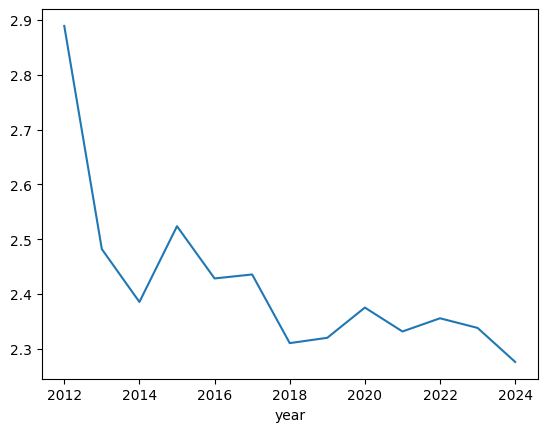

In [298]:
repairability_by_country_long.groupby('year')['Repairability'].mean().plot()

<Axes: xlabel='year'>

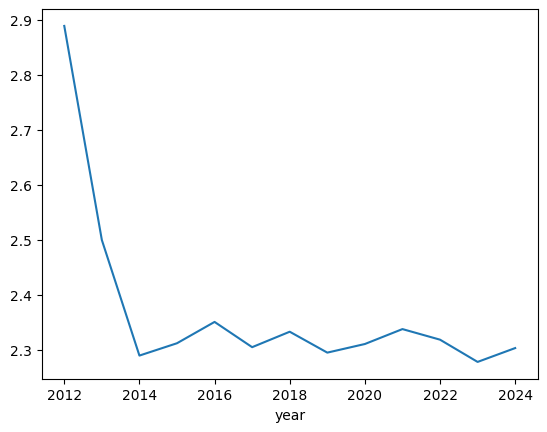

In [299]:
repairability_by_country_long.groupby('year')['Repairability'].median().plot()

In [300]:
repairability_by_country_long.groupby('year')['Repairability'].median()

year
2012    2.888889
2013    2.500000
2014    2.289998
2015    2.312408
2016    2.351145
2017    2.305263
2018    2.333333
2019    2.295359
2020    2.311005
2021    2.338113
2022    2.318888
2023    2.278468
2024    2.303634
Name: Repairability, dtype: float64

Repairability overall has decreased or remained the same.

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: Removed 232 rows containing missing values or values outside the scale range
(`geom_point()`). 



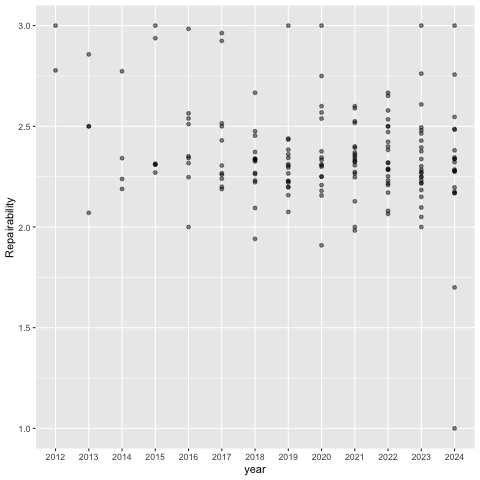

In [252]:
%%R -i repairability_by_country_long 

ggplot(repairability_by_country_long) +
    aes(x=year, y=Repairability) +
    geom_point (alpha=.5) 

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: Removed 232 rows containing missing values or values outside the scale range
(`geom_point()`). 



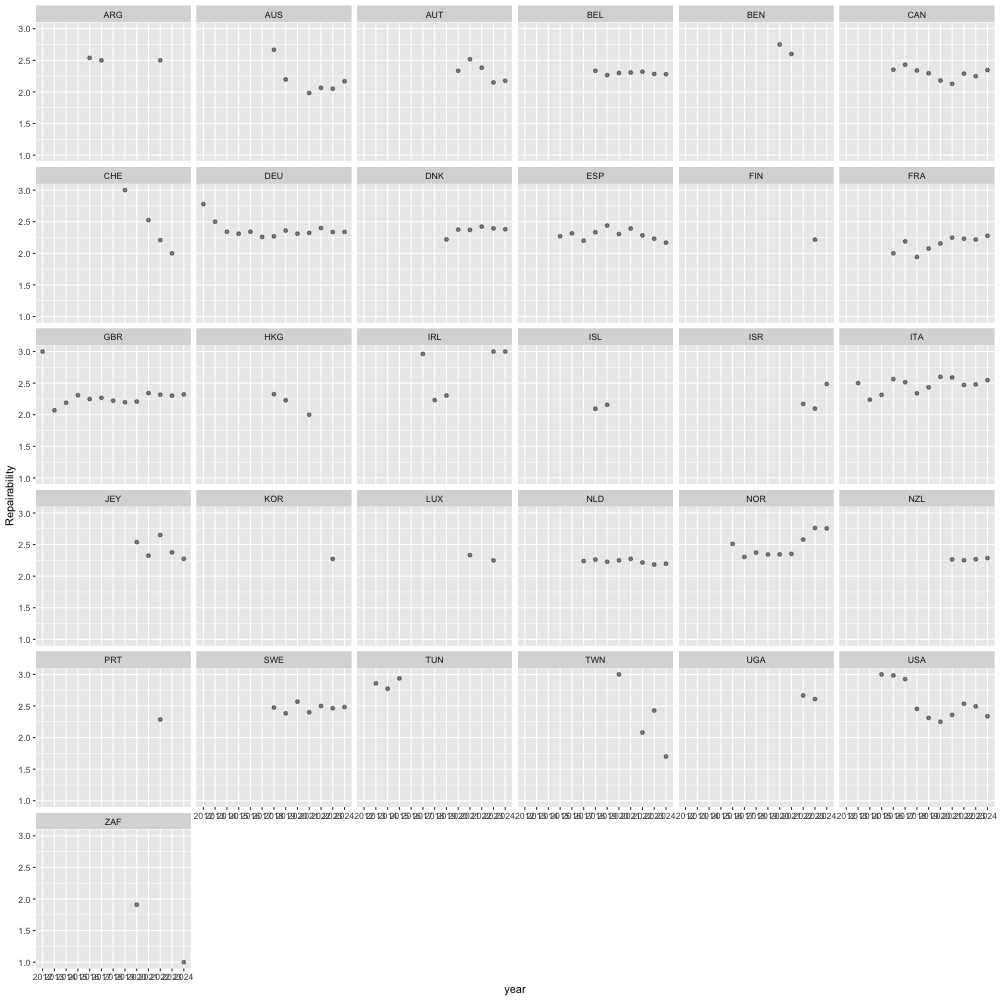

In [250]:
%%R -i repairability_by_country_long -h 1000 -w 1000

ggplot(repairability_by_country_long) +
    aes(x=year, y=Repairability) +
    geom_point (alpha=.5) +
    facet_wrap(~Country)

Although more people are repairing their items, the repairability of electronics hasn't increased over the years. In the US and Taiwan, it's gone down and in Norway it's gone up. Most countries have remained the same (despite more advocacy for right to repair laws and the EU law).

In [308]:
repair_status_countries = pd.pivot_table(df, index=['country'], columns=['repair_status'], values='problem', aggfunc="size")

repair_status_countries.dtypes

repair_status
End of life    float64
Fixed          float64
Repairable     float64
Unknown        float64
dtype: object

In [311]:
repair_status_countries['total'] = (
    repair_status_countries['End of life'].fillna(0) + 
    repair_status_countries['Fixed'].fillna(0) + 
    repair_status_countries['Repairable'].fillna(0) + 
    repair_status_countries['Unknown'].fillna(0))

In [312]:
repair_status_countries.head()

repair_status,End of life,Fixed,Repairable,Unknown,total
country,,,,,
ARG,141.0,465.0,11.0,NaN,617.0
AUS,569.0,731.0,354.0,NaN,1654.0
AUT,169.0,289.0,81.0,3.0,542.0
BEL,5954.0,13402.0,5802.0,193.0,25351.0
BEN,NaN,6.0,3.0,NaN,9.0


In [313]:
repair_status_countries['end_of_life_pct'] = repair_status_countries['End of life'] / repair_status_countries['total']

In [314]:
repair_status_countries['fixed_pct'] = repair_status_countries['Fixed'] / repair_status_countries['total']

In [315]:
repair_status_countries['repairable_pct'] = repair_status_countries['Repairable'] / repair_status_countries['total']

In [316]:
repair_status_countries['unknown_pct'] = repair_status_countries['Unknown'] / repair_status_countries['total']

In [317]:
repair_status_countries['repaired_or_repairable'] = (repair_status_countries['Fixed'] + repair_status_countries['Repairable'])/repair_status_countries['total']

In [318]:
repair_status_countries.head()

repair_status,End of life,Fixed,Repairable,Unknown,total,end_of_life_pct,fixed_pct,repairable_pct,unknown_pct,repaired_or_repairable
country,,,,,,,,,,
ARG,141.0,465.0,11.0,NaN,617.0,0.228525,0.753647,0.017828,NaN,0.771475
AUS,569.0,731.0,354.0,NaN,1654.0,0.344015,0.441959,0.214027,NaN,0.655985
AUT,169.0,289.0,81.0,3.0,542.0,0.311808,0.533210,0.149446,0.005535,0.682657
BEL,5954.0,13402.0,5802.0,193.0,25351.0,0.234863,0.528658,0.228867,0.007613,0.757524
BEN,NaN,6.0,3.0,NaN,9.0,NaN,0.666667,0.333333,NaN,1.000000


In [321]:
repair_status_countries = repair_status_countries.reset_index()

In [319]:
repair_status_countries.to_csv('repair_status_countries.csv')

In [326]:
repair_status_countries.sort_values(by='total')

repair_status,country,End of life,Fixed,Repairable,Unknown,total,end_of_life_pct,fixed_pct,repairable_pct,unknown_pct,repaired_or_repairable
24,PRT,2.0,4.0,1.0,NaN,7.0,0.285714,0.571429,0.142857,NaN,0.714286
4,BEN,NaN,6.0,3.0,NaN,9.0,NaN,0.666667,0.333333,NaN,1.000000
30,ZAF,5.0,3.0,4.0,NaN,12.0,0.416667,0.250000,0.333333,NaN,0.583333
19,KOR,2.0,8.0,12.0,NaN,22.0,0.090909,0.363636,0.545455,NaN,0.909091
20,LUX,5.0,11.0,7.0,NaN,23.0,0.217391,0.478261,0.304348,NaN,0.782609
10,FIN,8.0,13.0,2.0,NaN,23.0,0.347826,0.565217,0.086957,NaN,0.652174
28,UGA,NaN,18.0,11.0,NaN,29.0,NaN,0.620690,0.379310,NaN,1.000000
27,TWN,25.0,35.0,17.0,NaN,77.0,0.324675,0.454545,0.220779,NaN,0.675325
15,ISL,20.0,31.0,40.0,NaN,91.0,0.219780,0.340659,0.439560,NaN,0.780220
6,CHE,15.0,47.0,33.0,NaN,95.0,0.157895,0.494737,0.347368,NaN,0.842105


In [325]:
repair_status_countries[repair_status_countries['country'] == 'ZAF']

repair_status,country,End of life,Fixed,Repairable,Unknown,total,end_of_life_pct,fixed_pct,repairable_pct,unknown_pct,repaired_or_repairable
30,ZAF,5.0,3.0,4.0,NaN,12.0,0.416667,0.25,0.333333,NaN,0.583333
